<a href="https://colab.research.google.com/github/hoangdqvn/khmer-segmentation-crf/blob/main/CRF_Khmer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Khmer Word Segmentation using Conditional Random Fields
This notebook contains the complete code that can be run to see the results as part of the approach to make this a reproducable research. Instruction is included on how to setup and run in Google Colab or any other python notebook compatible environments.

This notebook conains two sections. 
1. **Report**:  covers the report potion of this study which describe the approach, the algorithm and the results. See "CRF-Khmer-Segmnt-Report.ipynb".
1. **Code**: shows the code which detail  the setup so you can follow along and see the excution results. You can execute the code in this Python notebook directly from your browser when setup to use Google Colab or other compatible systems.

Expand each section and subsection to see detail.



# Code

## Environment Setup

### Use this notebook in Google Colab
Google Colab is currently giving free access to run Python notebook. So you can open this notebook in Google Colab and connect to an runtime which allow you to execute the code on the server from your browser. Make sure to enable  GPU as your runtime.

If you view this from github, follow the instruction on the simple steps to setup, please see the README in Githubs for detail.

https://github.com/phylypo/khmer-crf-segmentation

### Install library
Every time to freshly connect to runtime you need to update your environment. Some time reconnect will give you previous state (such as idle time out). In this case, you don't need to reinstall the module or download the data. But rerun won't hurt it as we make each step re-runable.

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/GR\ -\ HEDSPI\ K61/Khmer/CRFHoang

/content/drive/MyDrive/GR - HEDSPI K61/Khmer/CRFHoang


In [4]:
# Character `!` in the beginning of the line indicates a shell command
!pip install sklearn_crfsuite

# import of the crf library
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

     |████████████████████████████████| 747kB 9.6MB/s 


### Downloading Data
This section shows how to download and extract data to be analyzed. We save our data in github in a compressed format. There are multiple sizes depends on which one you want to analyze. We will start with 100 articles and we run through the whole process. This makes it fast to run the experiment as we fine tune different approaches. At the end we will rerun the full 10k document.

In [5]:
sizes = ["100","500","1000","5000","10000"]
# Select available size (0-4) that you want to use
docsize = sizes[0]
data_dir = "kh_alt_" + docsize
file_name = data_dir + ".zip"

In [ ]:
# Download the file from `url` and save it
import urllib.request
base_url = "https://github.com/phylypo/segmentation-crf-khmer/raw/master/data/"
url = base_url + file_name
print("Downloading from:", url)
urllib.request.urlretrieve(url, file_name)

('kh_data_100_200b.zip', <http.client.HTTPMessage at 0x7f1d111c4a58>)

In [6]:
# Run shell command to extract files

# remove previous existing directory for rerun
!rm -rf {data_dir}
print("- Unzipping the file and show last few extracted files:")
!unzip {file_name} | tail -10

print("- Count the number of files:")
!ls -al {data_dir}/*_seg*.txt | wc -l

- Unzipping the file and show last few extracted files:
  inflating: kh_alt_100/250023_seg.txt  
  inflating: kh_alt_100/250074_seg.txt  
  inflating: kh_alt_100/250027_orig.txt  
  inflating: kh_alt_100/250030_seg.txt  
  inflating: kh_alt_100/250017_orig.txt  
  inflating: kh_alt_100/250074_orig.txt  
  inflating: kh_alt_100/250099_orig.txt  
  inflating: kh_alt_100/250088_seg.txt  
  inflating: kh_alt_100/250011_seg.txt  
  inflating: kh_alt_100/250031_orig.txt  
- Count the number of files:
100


In [8]:
!cat kh_alt_100/250023_seg.txt
!cat kh_alt_100/250023_orig.txt

ក្នុង នាម ជា សមាជិក សាធារណរដ្ឋ ចនសិន ត្រូវ បាន ជ្រើស រើស និង ត្រូវ ជ្រើស រើស ម្តង ទៀត ជា អភិបាល នៃ ញ៉ូវ ម៉ិកស៊ិកកូ នៅ ឆ្នាំ 1994 និង 1998 ។
ក្នុង ពេល អភិបាល ខេត្ត របស់ គាត់ គាត់ បដិសេធ របៀប វិរ លើស 750 ដែល ច្រើន ជាង អភិបាល ដទៃ ហើយ ចាក ចេញ ពី រដ្ឋ ដោយ បន្សល់ ប្រាក់ ចំណេញ នៃ គំរោង ហិរញ្ញវត្ថុ ចំនួន 1 ពាន់ លាន ដុល្លារ អាមេរិក ។
តាំង ពី ចាក ចេញ ពី ការិយាល័យ នៅ ឆ្នាំ 2003 សំរាប់ កំណត់ ពេល អាណិត គាត់ បាន លើក ពី ការ ទទួល ស្គាល់ កញ្ឆា ស្រប ច្បាប់ ហើយ ឡើង ភ្នំ អេវឺរេស ហើយ បាន ចូល នយោបាយ ជា ប្រធានាធិបតី ។
ក្នុង ឆ្នាំ 2008 នៃ បោះ ឆ្នោត បឋម គណ បក្ស សាធារណរដ្ឋ ចនសិន បាន គាំទ្រ លើ សមាជិក នៃ សមាជិក រុន ប៉ូល របស់ គណ បក្ស សេរី និយម នៅ ឆ្នាំ 1988 ជា បេក្ខជន ប្រធានាធិបតី ។
នៅ ឆ្នាំ 2012 គាត់ បាន ជ្រើស រើស ឈរ ឈ្មោះ យុទ្ធនា ការ ប្រធានាធិបតី របស់ គាត់ ហើយ ទាម ទារ ការ លើក ឈ្មោះ របស់ គណ បក្ស សាធារណរដ្ឋ នៅ ក្នុង ច្រក មិន អន្តរាគម និយម លើ បញ្ហា ការ ទូត និង ការ កាត់ ដ៏ ធំ លើ គំរោង ថវិការ របស់ សហព័ន្ធ ។
ទោះបី គាត់ បាន ចូល រួម ការ ពិភាក្សា របស់ គណ បក្ស សាធារណរដ្ឋ ២ នា ពេល ថ្មី ៗ ចនសិន ត្រូវ បាន ដក ដោយ មូល ហេតុ ធ្ល

### Option - map to google drive to get your data file
Steps to copy data file from google drive by mount the drive. This required authenticated to your Google account. Follow the prompt.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
!ls "/content/drive/MyDrive/GR - HEDSPI K61/Khmer/CRFHoang"*

CRF-Khmer-Segmentation.ipynb  kh_alt_100  kh_alt_100.zip


## Read data files

There are two formats in the list of files. 
- *_orig.txt: are the original content scrape from the website. 
- *_seg.txt: (old format) are the segmented data using space. Here you lose the original space.
- or *_seg_200b.txt: (new format) are the segmented data using   character. 

There is another file "meta.txt" which contain meta data and a corresponding url of the source for each file based on its id.

You may not see this invisible character ( ) unless you use specific tool that can view it. 'repr' in python can show this as ' '. In Windows 10, the notebook display as a red middle dot character. 

Each data file contains mulitple lines of text. Each line may end with a Khmer sentence terminator character.

We read all text into variable ***seg_text*** as a list of list string. seg_text[0] is the content of first file. 

Eg. First line of the third file would be: seg_text[3][0].

Similarly we have orig_text which read the orignal article format. This is not used for the training. This can be use to compare the orignal text with the segmented text.

In [10]:
import glob
import re

path = data_dir + '/*_seg.txt'  #  earlier format: *_seg.txt
files=glob.glob(path)

# global variables that use through out
seg_text = []
orig_text = []
# unique id of the article that can be matched to docId in meta.txt
doc_ids = []
for file in files:
  filenum = re.search(r'\d+_', file).group(0)
  doc_ids.append(filenum.replace("_",""))
  f=open(file, 'r')
  lines = f.readlines()
  f.close()
  seg_text.append(lines)
  
  # limit to 9K to avoid memory issue
  if len(seg_text) >= 9000: break #kcc=9000, char:5000, crash char on 7000
  
  # read orig text -- comment out (10K docs which do not have orig text)
  f=open(file.replace('_seg.txt', '_orig.txt'), 'r')
  lines = f.readlines()
  f.close()
  orig_text.append(lines)
  
print("number of file:", len(files))
print("number of doc_ids:", len(doc_ids)) # can see the origial text
print("len of seg_text:", len(seg_text), ' sample data[0][0]:', repr(seg_text[0][0]))
print("len of orig_text:", len(orig_text), ' sample data[0][0]:', repr(orig_text[0][0]))

number of file: 100
number of doc_ids: 100
len of seg_text: 100  sample data[0][0]: 'ខណៈ ការ ថយ ចុះ នៅ ក្នុង ពន្ធ ទៅ លើ ផលិត ផល ប្រេង ដោយ ភាគី កណ្តាល និង រដ្ឋាភិបាល គឺ ជា ដំណោះ ស្រាយ បណ្តោះ អាសន្ន មួយ ដំណោះ ស្រាយ យូរ អង្វែង គឺ កាត់ បន្ថយ ការ ប្រើប្រាស់ នៃ ផលិត ផល ប្រេង និង លើក កម្ពស់ ការ ស្រាវជ្រាវ ទៅ លើ ផលិត ផល ជំនួស របស់ វា ។\n'
len of orig_text: 100  sample data[0][0]: 'ខណៈការថយចុះនៅក្នុងពន្ធទៅលើផលិតផលប្រេងដោយភាគីកណ្ដាលនិងរដ្ឋាភិបាលគឺជាដំណោះស្រាយបណ្ដោះអាសន្នមួយដំណោះស្រាយយូរអង្វែងគឺកាត់បន្ថយការប្រើប្រាស់នៃផលិតផលប្រេងនិងលើកកម្ពស់ការស្រាវជ្រាវទៅលើផលិតផលជំនួសរបស់វា។\n'


## Preview the data
You can compare the segmented text to the orignal text. Notice that the orignal text may have invisible spaces ( ). Content creators sometimes use this invisible character to separate word internally in their text editor to help with spell check but this is not consistently uses between different organization. So we cannot rely on this character as a word separator.

The segment text we choose the compound words.

In [11]:
# see other sample data - full first article
# (the 100K zip data do not have orig text to save space)
idx = 0
spacer = '\u2022'
print("First segmented text article has %d sentences/lines." %len(orig_text[idx]))
for i, sentence in enumerate(orig_text[idx]):
  print(i, ". Original : %s" %orig_text[idx][i].strip().replace(' ',spacer))
  print(i, ". Segmented: %s" %seg_text[idx][i].strip().replace(' ',spacer))

First segmented text article has 10 sentences/lines.
0 . Original : ខណៈការថយចុះនៅក្នុងពន្ធទៅលើផលិតផលប្រេងដោយភាគីកណ្ដាលនិងរដ្ឋាភិបាលគឺជាដំណោះស្រាយបណ្ដោះអាសន្នមួយដំណោះស្រាយយូរអង្វែងគឺកាត់បន្ថយការប្រើប្រាស់នៃផលិតផលប្រេងនិងលើកកម្ពស់ការស្រាវជ្រាវទៅលើផលិតផលជំនួសរបស់វា។
0 . Segmented: ខណៈ•ការ•ថយ•ចុះ•នៅ•ក្នុង•ពន្ធ•ទៅ•លើ•ផលិត•ផល•ប្រេង•ដោយ•ភាគី•កណ្តាល•និង•រដ្ឋាភិបាល•គឺ•ជា•ដំណោះ•ស្រាយ•បណ្តោះ•អាសន្ន•មួយ•ដំណោះ•ស្រាយ•យូរ•អង្វែង•គឺ•កាត់•បន្ថយ•ការ•ប្រើប្រាស់•នៃ•ផលិត•ផល•ប្រេង•និង•លើក•កម្ពស់•ការ•ស្រាវជ្រាវ•ទៅ•លើ•ផលិត•ផល•ជំនួស•របស់•វា•។
1 . Original : នៅក្នុងសេចក្ដីថ្លែងAIADMKអគ្គលេខាធិកាចាយ៉ាឡាលីថាបាននិយាយថារដ្ឋាភិបាលអាចកាត់បន្ថយបញ្ហាតម្លៃដោយកាត់បន្ថយពន្ធលក់ទៅលើប្រេងសាំងនិងប្រេងម៉ាស៊ូត។
1 . Segmented: នៅ•ក្នុង•សេចក្តី•ថ្លែង•AIADMK•អគ្គ•លេខាធិការ•ចាយ៉ាឡាលីថា•បាន•និយាយ•ថា•រដ្ឋាភិបាល•អាច•កាត់•បន្ថយ•បញ្ហា•តម្លៃ•ដោយ•កាត់•បន្ថយ•ពន្ធ•លក់•ទៅ•លើ•ប្រេង•សាំង•និង•ប្រេង•ម៉ាស៊ូត•។
2 . Original : គ្មានអ្វីដែលមិនជាយោបល់របស់នាងទេប៉ុន្ដែអ្វីដែលលោកការ៉ូណានីហីបានផ្ដល់អោយនៅពេលនាងគឺជាប្រធានរដ្ឋមន្ដ្រីនាងបាននិយាយថាភាគីកណ្ដាលថ

Look at word count and most frequently used words/terms.

In [12]:
words = {}
word_count = 0
sentence_count = 0
wordspref = {}
for i, text in enumerate(seg_text):
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        sentence_count += 1
        for phrase in sentence.split():
          for word in phrase.split(' '):
            if len(word)==0 : continue
            word_count += 1
            words[word] = 1 if word not in words.keys() else words[word] + 1
            pref = word.strip(' ')[:1]
            if pref in wordspref:
              wlist = wordspref[pref]
              wlist.add(word)
              wordspref[pref] = wlist
            else: wordspref[pref] = set(word)
print("total number of articles:", len(seg_text))
print("total number of sentences:", sentence_count, " words:", word_count)
print("total number of distinct words:", len(words))
print("total number of different starts-with characters:", len(wordspref))

print("Count number of words begin with: > 100")
for ws in sorted(wordspref):
    s = wordspref[ws]
    if (len(s)>100) : print("letter:", ws, " count:", len(s))

from collections import Counter
d = Counter(words)
print("Most frequent words:", d.most_common()[:20])

print("Most lease 20 words:", d.most_common()[-20:])

#for c in range(ord('ក'), ord('ឤ')):
#  print(chr(c))

### For 9K articles
#total number of articles: 9000
#total number of sentences: 87369
#total number of words: 46171
### For 100 articles (old *.seg.txt)
#total number of sentences: 1028  words: 35359
#total number of distinct words: 4628
#total number wordspref: 139

total number of articles: 100
total number of sentences: 1000  words: 33349
total number of distinct words: 3506
total number of different starts-with characters: 114
Count number of words begin with: > 100
letter: ក  count: 197
letter: ច  count: 116
letter: ជ  count: 102
letter: ប  count: 350
letter: ព  count: 106
letter: ម  count: 162
letter: រ  count: 153
letter: ស  count: 357
letter: ហ  count: 138
letter: អ  count: 261
Most frequent words: [('បាន', 1188), ('។', 1001), ('ការ', 887), ('នៅ', 744), ('ដែល', 576), ('ក្នុង', 541), ('"', 479), ('ជា', 466), ('ថា', 438), ('របស់', 408), ('និង', 384), ('ពី', 372), ('ត្រូវ', 367), ('នៃ', 325), ('អ្នក', 305), ('មាន', 293), ('មួយ', 274), ('ទី', 249), ('ទៅ', 241), ('នេះ', 231)]
Most lease 20 words: [('ប្រអប់', 1), ('ចំឡែក', 1), ('ឥសាន', 1), ('ព្រេង', 1), ('និទាន', 1), ('ទទេ', 1), ('ឌីអិនអេ', 1), ('ងងឹត', 1), ('ថាមអនឡាន', 1), ('សំណើច', 1), ('ជែហ្វី', 1), ('ប៉ូលិស', 1), ('លិខិត', 1), ('ជំនឿ', 1), ('សុចរឹត', 1), ('ហ្រង់ស៊ីស', 1), ('កុំប៉ោន', 1), ('ដុ

In [13]:
# finding some words
w = 'ប្រអប់' #'ឧត្តរ' #'ពិពិធកម្ម'#"អាមេរិក"
if w in words.keys(): print("found word ", w, "count:", words[w])

# test finding string
found = []
for i, text in enumerate(seg_text):
    for sentence in text:
        if w in sentence: found.append(sentence)
print("total # sentences found:", len(found))
for f in found:
  print("-sentence: %s" %(repr(f)))

found word  ប្រអប់ count: 1
total # sentences found: 1
-sentence: 'ពូក អ្នក ស្រាវជ្រាវ និយាយ ថា បរុស ២ នាក់ អះអាង ជា អ្នក បរ បាញ់ " ប្រអប់ ជើង ធំ " នៅ ហ្សកហ្សា សហ រដ្ឋ អាមេរិក ចំពោះ ការ រក ឃើញ ស្នាម នៅ សល់ របស់ សត្វ ចំឡែក នៅ ដើម ខែ នេះ គឺ ជា ផ្នែក មួយ នៃ ការ បោក បញ្ឆោត យ៉ាង ច្បាស់ ។\n'


## Prepare Data
Each  seg text contains list of sentences. We want a list of sentences in variable 'sentences'. We also clean up the extra spaces or new line character.

Here we allow to fix any known bad segmented data such as names.

### Correction list

In [14]:
# the str assume \200b wrapped around any spaces -- this can be removed during output
# the first set use 200b string that may not visible in the note book. 
# Windows 10 shows as middle dot in Colab Classic Mode.
# the bottom set us   instead for easy to spot
def get_correction_list():
  fixes=[]
  #fix bad segmented data - especially proper noun
  fixes.append(['អា​ខោន​','អាខោន​']) #account 
  fixes.append(["​ឱវា​ទ","​ឱវាទ"])
  fixes.append(["នៅ​សប្តា​ហ៏​","នៅ​សប្តាហ៏​"])
  fixes.append(['ស៊ុន​ ​ចាន់​ថុល','ស៊ុន​ ​ចាន់ថុល'])
  fixes.append(['សាយ​ ​មក​រា','សាយ​ ​មករា'])
  fixes.append(['រោង​កុន','រោងកុន'])
  fixes.append(['ដេី​មជ្រៃ','ដេីមជ្រៃ'])
  fixes.append(['​ដេី​ម​','​ដេីម​'])
  fixes.append(['មន្ទី​ពេទ្យ','មន្ទីពេទ្យ'])
  fixes.append(['ជាដរាបត​ទៅ','ជា​ដរាប​តទៅ'])
  fixes.append(['ដេី​ម្បី​','ដេីម្បី​'])
  fixes.append(['ធ្វេី​ការកាត់​យក','ធ្វេីការ​កាត់​យក']) # interesting!!!!
  fixes.append(['ភូមិ​ផ្សារ​ដី​ហុយ','ភូមិ​ផ្សារដីហុយ'])
  fixes.append(['សុខ​ ​ពេញ​វុធ','សុខ​ ​ពេញវុធ'])
  fixes.append(['ប្រតិបត្តិការបង្ក្រាប','ប្រតិបត្តិការ​បង្ក្រាប'])
  fixes.append(['health​.​com​.​kh','health.com.kh'])
  fixes.append(['ពួយ​ ​ច័ន្ទ​សុគុណ','ពួយ​ ​ច័ន្ទសុគុណ'])
  fixes.append(['ភូមិ​ ​ថ្ម​ដា','ភូមិ​ ​ថ្មដា'])
  fixes.append(['សង្កាត់​ ​បឹង​កន្សែង','សង្កាត់​ ​បឹងកន្សែង']) # TODO what is orig text???
  fixes.append(['ក្រុង​ ​បាន​លុង','ក្រុង​ ​បានលុង'])
  fixes.append(['នុត​ ​សុគន្ធ​ ​ផាន់​នី','នុត​ ​សុគន្ធ​ ​ផាន់នី'])
  #fixes.append(['ព្រះរាជាណា ច្រក កម្ពុជា','ព្រះរាជាណាច្រ ក កម្ពុជា']) #bad spelling – no better seg
  fixes.append(['កាក​បាត​ក្រហម','កាកបាត​ក្រហម']) # from https://www.redcross.org.kh/ កាកបាទក្រហមកម្ពុជា
  fixes.append(['ស្រុក​ ​កំពង់ត្រា​ច','ស្រុក​ ​កំពង់ត្រាច'])
  fixes.append(['ឃុំ​ ​ថ្ម​កែវ','ឃុំ​ ​ថ្មកែវ'])
  fixes.append(['ស្រុក​ ​អង្គរ​ជ័យ','ស្រុក​ ​អង្គរជ័យ'])
  fixes.append(['កោះ​តា​កូវ ឃុំ​ឬ​ស្សី','កោះ​តាកូវ ឃុំ​ឬស្សី'])
  fixes.append(['ម៉ាក​ ​សែន​សូនីតា','ម៉ាក​ ​សែនសូនីតា'])
  fixes.append(['ជា​ ​ដេី​ម​ ​នោះ','ជា​ ​ដេីម​ ​នោះ'])
  fixes.append(['ដេី​ម្បី​ ​ជ្រាប','ដេីម្បី​ ​ជ្រាប']) #prob eiy is two chars េ ⁣ី instead of one char
  fixes.append(['ក​រករណី','ករ​ករណី'])
  fixes.append(['ទោ​ចក្រ​យានយន្ត','ទោចក្រយានយន្ត'])
  fixes.append(['ឃុំ​ ​អន្លង់​វិល','ឃុំ​ ​អន្លង់វិល'])
  fixes.append(['​ពោធ៍​សាត់','​ពោធ៍សាត់'])
  fixes.append(['ណាក់​ ​ស្រី​ណា','ណាក់​ ​ស្រីណា'])
  fixes.append(['ពិធីការ​នីមួយ','ពិធីការនី​មួយ']) #valid both ways, need context
  fixes.append(['តូរុន​តូ','តូរុនតូ']) #Toronto
  fixes.append(['ដាយ​ណូស័រ','ដាយណូស័រ']) #Dinosaur
  fixes.append(['ហ្គារ៉ាល់​ហូស','ហ្គារ៉ាល់ហូស']) #Guarulhos in Sao Paulo
  fixes.append(['ខេមរៈ​ ​សិរី​មន្ត','ខេមរៈ​ ​សិរីមន្ត'])#ខេមរៈ  សិរី មន្ត
  fixes.append(['ឱម​ ​យ៉ិន​ទៀង','ឱម​ ​យ៉ិនទៀង'])
  fixes.append(['មហា​លាប','មហាលាប'])
  fixes.append(['ការចាប់អារម្ម​ណ៏​','ការចាប់អារម្មណ៏​'])
  fixes.append(['វ៉ិច​ទ័រ​','វ៉ិចទ័រ​']) #rector
  fixes.append(['សុវណ្ណ​ ​ឬ​ទ្ធី','សុវណ្ណ​ ​ឬទ្ធី'])
  fixes.append(['ខាន់​ ​ចាន់​សុផល','ខាន់​ ​ចាន់សុផល'])
  fixes.append(['ទំនួលខុសត្រូវ​','ទំនួល​ខុសត្រូវ​'])
  fixes.append(['ឯ​ណេះ','ឯណេះ']) #confirm with Chuon Nath Dict
  fixes.append(['ហេយ៍​វ៉ិន','ហេយ៍វ៉ិន']) #heaven
  fixes.append(['សុខ​ ​ពេញ​វុធ','សុខ​ ​ពេញវុធ'])
  fixes.append(['វ៉ុល​កា','វ៉ុលកា']) #vulgar
  fixes.append(['ជា​ម​ ​ហុី​ម','ជាម​ ​ហុីម'])
  fixes.append(['​ការ​ប្រកាស​','​ការប្រកាស​'])
  fixes.append(['អនុ​ប្រធាន','អនុប្រធាន'])
  fixes.append(['កិច្ចខិតខំប្រឹងប្រែង','កិច្ច​ខិតខំ​ប្រឹងប្រែង']) #???
  fixes.append(['សស្អាត','ស​ស្អាត'])
  fixes.append(['ហាន់​ ​ជី​អ៊ុន','ហាន់​ ​ជីអ៊ុន'])
  fixes.append(['ស៊ុន​ ​ចាន់​ថុល','ស៊ុន​ ​ចាន់ថុល'])
  fixes.append(['លីន​ដា​','លីនដា​'])
  fixes.append(['យានយន្តបន្ទាប់ពី','យានយន្ត​បន្ទាប់ពី'])
  fixes.append(['ព្រៃ​ស្អាក​ស្រុក​អន្លង់​វែង','ព្រៃស្អាក​ស្រុក​អន្លង់វែង'])
  fixes.append(['​ប៉ា​កុង​','​ប៉ាកុង​']) # first 50 articles
  fixes.append(['ឈើ​ ​អុស​ក្រាក់','ឈើ​ ​អុសក្រាក់'])
  fixes.append(['រតនៈ​គីរី​','រតនៈគីរី​'])
  fixes.append(['ឯក​ឧត្តម','ឯកឧត្តម'])
  fixes.append(['ឱម​ ​យិន​ទៀង','ឱម​ ​យិនទៀង'])
  fixes.append(['​ចំដែនដី​','​ចំ​ដែនដី​']) # orig has space after រៀប
  fixes.append(['ឱវា​ទ','ឱវាទ']) # correct spelling
  fixes.append(['អ៊ិន​វេស​មិន','អ៊ិនវេសមិន']) #investment
  fixes.append(['សហគម​ន៏','សហគមន៏'])
  fixes.append(['​គ្រូ​សារ​','​គ្រូសារ​']) # orig has bad ub, mispelled but should be removed before seg
  fixes.append(['សុផុនពេល​សួរ','សុផុន​ពេល​សួរ'])
  fixes.append(['ស្រុក​កែវ​សីម៉ា','ស្រុក​កែវសីម៉ា'])
  fixes.append(['ហាន់​ជ័យ','ហាន់ជ័យ'])
  fixes.append(['បូរី​ ​ស​ចនសុន','បូរីស​ ​ចនសុន'])
  fixes.append(['បូរី​ ​ស​ចន​សុន','បូរីស​ ​ចនសុន'])
  fixes.append(['បូរីស​ ​ចន​សុន','បូរីស​ ​ចនសុន'])
  fixes.append(['អំណ​រ​គុណ','អំណរ​គុណ']) # bad orig
  fixes.append(['ផលប៉ះពាល់​','ផល​ប៉ះពាល់​']) # ???
  fixes.append(['អ្នកវិនិយោគ​','អ្នក​វិនិយោគ​']) #???
  fixes.append(['ភូមិ​ ​ស្រះ​ជ្រៃ​','ភូមិ​ ​ស្រះជ្រៃ​'])
  fixes.append(['ឃុំ​ ​បន្ទាយ​ឆ្មា​','ឃុំ​ ​បន្ទាយឆ្មា​'])
  fixes.append(['ស្រុក​ ​ថ្ម​ពួក​','ស្រុក​ ​ថ្មពួក​'])
  fixes.append(['ទ្វីត​ធឺ','ទ្វីតធឺ']) #twitter
  fixes.append(['​ធំ​ដុំ','​ធំដុំ'])
  fixes.append(['​រួមមាន​','​រួម​មាន​']) #?
  fixes.append(['គុយ​វ៉ែត','គុយវ៉ែត'])
  fixes.append(['ងងុយគេង','ងងុយ​គេង'])
  fixes.append(['ស​ម​ ​រង្ស៊ី','សម​ ​រង្ស៊ី'])
  fixes.append(['សោ​ ​ចាន់​ដេត','សោ​ ​ចាន់ដេត'])
  fixes.append(['ជាលាយលក្ខណ៍អក្សរ','ជា​លាយលក្ខណ៍​អក្សរ'])
  fixes.append(['ផលិតកម្មវិធី','ផលិតកម្ម​វិធី'])
  fixes.append(['​សាជាថ្មី​','​សា​ជា​ថ្មី​']) # ???
  fixes.append(['ឧកញ៉ា​ស្រី​ ​ចាន់​ថន','ឧកញ៉ា​ ​ស្រី​ ​ចាន់ថន'])
  fixes.append(['ភូមិ​ ​ព្រៃ​ល្វា','ភូមិ​ ​ព្រៃល្វា'])
  fixes.append(['សង្កាត់​ ​ចោម​ចៅ ','សង្កាត់​ ​ចោមចៅ'])
  fixes.append(['ខណ្ឌ​ ​ពោធិ៍​សែន','ខណ្ឌ​ ​ពោធិ៍សែន'])
  fixes.append(['ឃុំ​ ​ព្រែក​តា​មាក់','ឃុំ​ ​ព្រែកតាមាក់'])
  fixes.append(['​បាត់បង្ក','​បាត់​បង្ក'])
  fixes.append(['កើតមានឡើង','កើត​មាន​ឡើង'])
  fixes.append(['លូក​លាន់','លូកលាន់'])
  fixes.append(['លោក​ ​ជិន​ ​ម៉ាលី​ន','លោក​ ​ជិន​ ​ម៉ាលីន'])
  fixes.append(['អ្នករាយការណ៍','អ្នក​រាយការណ៍'])
  fixes.append(['គង់​ ​រ៉ៃ​យ៉ា','គង់​ ​រ៉ៃយ៉ា'])
  fixes.append(['លោក​ ​សួង​ ​នាគ​ព័ន្ធ','លោក​ ​សួង​ ​នាគព័ន្ធ'])
  fixes.append(['ធ្វើទុក្ខបុកម្នេញ','ធ្វើ​ទុក្ខបុកម្នេញ'])  # doc 75 mark
  fixes.append(['បោះបង់ចោល','បោះបង់​ចោល'])
  fixes.append(['ខ្លួនឯង','ខ្លួន​ឯង']) # ???
  fixes.append(['សប្បាយចិត្ត','សប្បាយ​ចិត្ត'])
  fixes.append(['មើលទៅ','មើល​ទៅ']) # ??? if
  fixes.append(['សោយសុខ','សោយ​សុខ'])
  fixes.append(['ទៅលើ','ទៅ​លើ'])
  fixes.append(['ឃុំខ្លួន','ឃុំ​ខ្លួន'])
  fixes.append(['ជាប់ឃុំ','ជាប់​ឃុំ'])
  fixes.append(['លោក​ ​ហេង​ ​ដូន​នី','លោក​ ​ហេង​ ​ដូននី'])
  fixes.append(['លោក​ ​កែម​ ​គិម​ស្រន់','លោក​ ​កែម​ ​គិមស្រន់'])
  fixes.append(['ស្រុក​ ​វាល​វែង','ស្រុក​ ​វាលវែង'])
  fixes.append(['ចោទប្រកាន់តែ','ចោទប្រកាន់​តែ']) # doc 80 mark
  fixes.append(['ឈិញ​ ​ស៊ី​ថា','ឈិញ​ ​ស៊ីថា'])
  fixes.append(['ដាក់ពាក្យបណ្តឹង','ដាក់​ពាក្យ​បណ្តឹង'])
  fixes.append(['ម៉ាក​ ​ណូ​គា','ម៉ាក​ ​ណូគា'])
  fixes.append(['ធូ​ ​ស្រី​ទូច','ធូ​ ​ស្រីទូច'])
  fixes.append(['ម៉ូតូកង់​បី','ម៉ូតូ​កង់​បី'])
  fixes.append(['ឃុំ មង់​រៀវ','ឃុំ មង់រៀវ'])
  fixes.append(['លោក​ ​ជា​ ​ចាន់​តូ','លោក​ ​ជា​ ​ចាន់តូ'])
  fixes.append(['ស៊ែ​ស្វី​ច','ស៊ែ​ស្វីច']) #shared switch
  fixes.append(['ប្រតិបត្តិការផ្ទេរ','ប្រតិបត្តិការ​ផ្ទេរ'])
  fixes.append(['បញ្ជាការស្រាល','បញ្ជាការ​ស្រាល'])
  fixes.append(['F​-​16','F-16'])
  fixes.append(['C​-​17','C-17'])
  fixes.append(['គោលនយោបាយ','គោល​នយោបាយ']) # id 90 mark
  fixes.append(['ហាន​ ​សុខ​ន','ហាន​ ​សុខន'])
  fixes.append(['ខៀវ​ ​ទេ​ព','ខៀវ​ ​ទេព'])
  fixes.append(['កាញារី​ទ្ធ','កាញារីទ្ធ'])
  fixes.append(['ជី​ហែ','ជីហែ']) # ផ្សារជីហែ
  fixes.append(['វិទ្យាល័យ​ ​ជី​ហែរ','វិទ្យាល័យ​ ​ជីហែរ'])
  fixes.append(['ស្រុកោះ​កោះ​សូទិន','ស្រុកោះ​កោះសូទិន'])
  fixes.append(['ជំរុញឲ្យ','ជំរុញ​ឲ្យ'])
  fixes.append(['ការបាក់ទឹកចិត្ត','ការបាក់​ទឹកចិត្ត'])
  fixes.append(['ហង់ ជួន​ណារីតា','ហង់ ជួនណារីតា'])
  fixes.append(['ជាទីមោទនៈ','ជា​ទី​មោទនៈ'])
  fixes.append(['សឿ សុជា​តា','សឿ សុជាតា'])
  fixes.append(['ហង់​ ​ជួន​ណារ៉ុន','ហង់​ ​ជួនណារ៉ុន'])
  fixes.append(['ក​សាង​ធនធាន','កសាង​ធនធាន'])
  fixes.append(['ស្នង​ឬ​ស្សី','ស្នង​ឬស្សី'])
  fixes.append(['ខៀវ​ ​កាញារី​ទ្ធ','ខៀវ​ ​កាញារីទ្ធ'])
  fixes.append(['ត្រេន​ ​ដី​ង','ត្រេនដីង']) #trending
  fixes.append(['ទៅវិញទៅមក','ទៅ​វិញ​ទៅ​មក']) # ??
  fixes.append(['ក្ដី​ស្រមៃ','ក្ដីស្រមៃ']) #prob mispell jerg da
  fixes.append(['ឬ​ស្សីកែវ','ឬស្សីកែវ'])
  fixes.append(['អេង​ ​សុវណ្ណ​តារា','អេង​ ​សុវណ្ណតារា'])
  fixes.append(['កុង​ទីន​រ័','កុងទីនរ័'])
  fixes.append(['ជាបន្តបន្ទាប់','ជា​បន្តបន្ទាប់'])
  fixes.append(['ចលត័ជាប្រចាំ','ចលត័​ជា​ប្រចាំ'])
  fixes.append(['ឃុំ​ដី​ឥដ្ឋ','ឃុំ​ដីឥដ្ឋ'])
  fixes.append(['វី​ដែ​អូ','វីដែអូ']) #misspell វីដេអូ 
  fixes.append(['ត្រី​ខ​','ត្រីខ​'])
  fixes.append(['ទឹក​ត្រី​','ទឹកត្រី​'])
  fixes.append(['បង្ខំឲ្យ','បង្ខំ​ឲ្យ']) # first hundred docs
  fixes.append(['ស្ដុក ប្រវឹក','ស្ដុកប្រវឹក'])
  fixes.append(['វាល រិញ ','វាលរិញ '])
  fixes.append(['ណៃ   វង្ស ដា','ណៃ   វង្សដា'])
  fixes.append(['លោក   ឃ ន  ជឺ ','លោក   ឃន   ជឺ '])
  fixes.append(['បុត   ចាន់ ណា','បុត   ចាន់ណា'])
  fixes.append(['ឯ ម   ច័ន្ទ មក រា','ឯម   ច័ន្ទមករា'])
  fixes.append(['សង់ ដ្រី ន   ឌុយ រី','សង់ដ្រីន   ឌុយរី'])
  fixes.append(['សុខ   ពេញ វុធ','សុខ   ពេញវុធ'])
  fixes.append(['សោម  ពុទ្ធ តារា','សោម  ពុទ្ធតារា'])
  fixes.append(['ម៉ៅ  ច័ន្ទ មធុរិទ្ធ','ម៉ៅ  ច័ន្ទមធុរិទ្ធ'])
  fixes.append(['បូពិន្ទ  ណា រ័ត្ន','បូពិន្ទ  ណារ័ត្ន'])
  fixes.append(['ជា   ប៊ុន ហេង','ជា   ប៊ុនហេង'])
  fixes.append(['ណារិក ដ្រា   មូឌី','ណារិកដ្រា   មូឌី'])
  fixes.append(['ស្រុក ព្រៃ នប់','ស្រុក ព្រៃនប់'])
  fixes.append(['ស្រុក ព្រៃ នប់','ស្រុក ព្រៃនប់'])
  fixes.append(['ខណ្ឌ ចំការ មន','ខណ្ឌ ចំការមន'])
  fixes.append(['ខណ្ឌ ពោធិ៍ សែន ជ័យ','ខណ្ឌ ពោធិ៍សែនជ័យ'])
  fixes.append(['សង្កាត់ ទឹក ល្អក់','សង្កាត់ ទឹកល្អក់'])
  fixes.append(['សង្កាត់ ផ្សារ ថ្មី','សង្កាត់ ផ្សារថ្មី'])
  fixes.append(['សង្កាត់ ជ្រោយ ចង្វារ','សង្កាត់ ជ្រោយចង្វារ'])
  fixes.append(['សង្កាត់ វាល វង់','សង្កាត់ វាលវង់'])
  fixes.append(['សង្កាត់ កោះ ដាច់','សង្កាត់ កោះដាច់'])
  fixes.append(['សង្កាត់ ចាក់អង្រែ លើ','សង្កាត់ ចាក់អង្រែលើ'])
  fixes.append(['សង្កាត់ ទន្លេ បាសាក់','សង្កាត់ ទន្លេបាសាក់'])
  fixes.append(['ឃុំ ត្រពាំង ជោ','ឃុំ ត្រពាំងជោ'])
  fixes.append(['ឃុំ ក្រាំង ល្វា','ឃុំ ក្រាំងល្វា'])
  fixes.append(['ឃុំ ដូន សរ','ឃុំ ដូនសរ'])
  fixes.append(['ឃុំ អូរ តាប៉ោង','ឃុំ អូរតាប៉ោង'])
  fixes.append(['ឃុំ ក្បាល ដំរី','ឃុំ ក្បាលដំរី'])
  fixes.append(['ឃុំ ត្រពាំង គង','ឃុំត្រពាំងគង'])
  fixes.append(['ភូមិ ច្រក ទៀក','ភូមិ ច្រកទៀក'])
  fixes.append(['ភូមិ ខ្សាច់ ស','ភូមិ ខ្សាច់ស'])
  fixes.append(['ភូមិ អូរ ត្រូន','ភូមិ អូរត្រូន'])
  fixes.append(['ភូមិ ថ្ម ធំ','ភូមិ ថ្មធំ'])
  fixes.append(['ភូមិ ចំការ ដូង','ភូមិ ចំការដូង'])
  fixes.append(['ភូមិ ព្រៃ ផ្តៅ','ភូមិ ព្រៃផ្តៅ'])
  fixes.append(['ភូមិ បឹង វែង','ភូមិ បឹងវែង'])
  fixes.append(['   .   com ','.com '])
  fixes.append(['ចូ   បាយ ដិន','ចូ   បាយដិន'])
  fixes.append([' ណាន់ ស៊ី ',' ណាន់ស៊ី '])
  fixes.append(['លោក ត្រាំតទៅទៀត','លោក ត្រាំ តទៅទៀត'])

  #fixes.append(['','']) #u200bប៊ុល ហ្គារី  ,   ហុង គ្រី  Hungary
  return fixes


fixes = get_correction_list()
print("count", len(fixes), " data[0]:", fixes[0])

count 199  data[0]: ['អា\u200bខោន\u200b', 'អាខោន\u200b']


### Parse and correct sentences

In [15]:
def correct_str(str):
  for f in fixes:
    str = str.replace(f[0], f[1])
  return str

def cleanup_str(str):
  str = str.strip(' ').strip()
  str = str.replace("  ", " ") # clean up 2 spaces to 1
  str = str.replace(" ", "   ")   # ensure 200b around space
  # clean up
  str = str.replace("  ", ' ')   # clean up dupe 200b
  str = str.replace("  ", ' ')   # in case multiple
  str = correct_str(str) # assume space has 200b wrapped around
  
  # remove special characters
  str = str.replace(u"\u2028", "") # line separator
  str = str.replace(u"\u200a", "")  # hair space
  str = str.strip().replace('\n','').replace('  ',' ')
  return str

# setup training data using seg
sentences = list()
for i, text in enumerate(seg_text):
    for sentence in text:
        sentences.append(cleanup_str(sentence))
print("total len of sentences:", len(sentences))

# id=99
# print("id:",doc_ids[id])
# for i,s in enumerate(seg_text[id]):
#   print("sample sentence: %s" %(cleanup_str(s)))
#   print("orig sentence: %s" %(repr(orig_text[id][i])))


total len of sentences: 1000


### Check count and searching

In [16]:
# search more match text in the correction list
import re
total = 0
for sen in sentences[0:813]: #todo search small set only
  for f in fixes:
    m = [m.start() for m in re.finditer(f[0], sen)]
    n = [m.start() for m in re.finditer(f[1], sen)]
    if len(m) >0:
      total += len(m)
      s = sen[m[0]:(m[0]+20)]
      #if (len(m)) > 0: print(total, "len:", len(m), " str:", repr(f[0]), "sen:", sen)
      #print("match: search=", repr(f[0]), "fix:", repr(f[1]), " sen:", repr(s))
      
print("total corrections:",total, " total sen:", len(sentences)) #127 -> 147/871



total corrections: 0  total sen: 1000


In [17]:
# search Orig text
found = []
s = "អាក្រក់".strip()
#s = "លោក".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  #print("start idx:", sidx, eidx, "len:", len(sen))
  #print("Found s:", repr(sen[sidx:eidx]))
  print("Found s:", sen[sidx:eidx].replace(' ', spacer))

total len of found: 5
Found s: "គ្រាប់បែកអាក្រក់។"

Found s: ្រឹត្តអំពើអាក្រក់ប៉ុន្តែត្រូវបានដោះលែងដោយគ្មានការចោទប្រ
Found s: ហ្រ្វិកដែលអាក្រក់ជាងជនជាតិអាមេរិកស្បែកសរ។

Found s: ង្គិចនេះគឺអាក្រក់បំផុតនៅតំបន់•តាំងពីមហន្តរាយមួយនៅខែមេសា
Found s: ត៌មានគឺមិនអាក្រក់ទាំងស្រុងទេក៏ប៉ុន្តែដូចដែលនាវាដឹងប្រេង


In [18]:
#search segmented text

#អ្នក ក្តៅ ចិត្ត  <= អ្នកក្តៅចិត្ត, តួរ ចិត្ត អាក្រក់<= តួរចិត្ត អាក្រក់,  ថាមពល<=ថា មពល, ម្យ៉ាងទៀត<=ម្យ៉ាង ទៀត, កិច្ចការពារ <=កិច្ច ការពារ, 
#មហា អំណាច <= មហាអំណាច , អំពើហិង្សា<=អំពើ ហិង្សា, ញាំ ក្រូច ថ្លុង<=ញាំក្រូចថ្លុង , ខ ប៉េងប៉ោះ<=ខ ប៉េងប៉ោះ, 
# ម តិ , ម៉ៅ•សេ•ទុង=>ម៉ៅ•សេទុង•

# search final text
s = "ម្អ"
spacer = '\u2022'
found = []
for i, text in enumerate(sentences): #enumerate(seg_text):
    if s in text: found.append(text)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  print("Found s:", sen[sidx:eidx].replace(' ',spacer))

total len of found: 1
Found s: ំរាប់•កែ•លម្អ•រដ្ឋាភិបាល•អៀរឡង់•ខាង•ជើង•។


## Create Features
This section implements different methods to generate KCC and features for CRF.

### KCC

We implementated the segmentation of Khmer orthographic or Khmer character cluster (KCC) in a simpler way. Instead of check for all possible rules from the start of each character, we just check the next character and determine whether it is a type that start a new KCC. So the current character is the end of the current KCC. If there are series of invalid KCC string, this approach does not separate those. But segmented it would leave the next segment invalid any way.

In addition, we take advantage of this cluster and cluster non segmentable characters like number and non-Khmer word.

In [19]:
#@title Segment into KCCs 

# list of constants needed for KCC and feature generation
# consonant and independent vowels
KHCONST = set(u'កខគឃងចឆជឈញដឋឌឍណតថទធនបផពភមយរលវឝឞសហឡអឣឤឥឦឧឨឩឪឫឬឭឮឯឰឱឲឳ')
KHVOWEL = set(u'឴឵ាិីឹឺុូួើឿៀេែៃោៅ\u17c6\u17c7\u17c8')
# subscript, diacritics
KHSUB = set(u'្')
KHDIAC = set(u"\u17c9\u17ca\u17cb\u17cc\u17cd\u17ce\u17cf\u17d0") #MUUSIKATOAN, TRIISAP, BANTOC,ROBAT,
KHSYM = set('៕។៛ៗ៚៙៘,.? ') # add space
KHNUMBER = set(u'០១២៣៤៥៦៧៨៩0123456789') # remove 0123456789
# lunar date:  U+19E0 to U+19FF ᧠...᧿
KHLUNAR = set('᧠᧡᧢᧣᧤᧥᧦᧧᧨᧩᧪᧫᧬᧭᧮᧯᧰᧱᧲᧳᧴᧵᧶᧷᧸᧹᧺᧻᧼᧽᧾᧿')

def is_khmer_char(ch):
  if (ch >= '\u1780') and (ch <= '\u17ff'): return True
  if ch in KHSYM: return True
  if ch in KHLUNAR: return True
  return False

def is_start_of_kcc(ch):
  if is_khmer_char(ch):
    if ch in KHCONST: return True
    if ch in KHSYM: return True
    if ch in KHNUMBER: return True
    if ch in KHLUNAR: return True
    return False
  return True

# kcc base - must surround space with   using cleanupstr()
def seg_kcc(str_sentence):
    segs = []
    cur = ""
    sentence = str_sentence
    #for phr in str_sentence.split(): #no longer split by space, use 200b
    #    print("phr: '", phr,"'")
    for word in sentence.split(' '):
      #print("PHR:[%s] len:%d" %(phr, len(phr)))
      for i,c in enumerate(word):
          #print(i," c:", c)
          cur += c
          nextchar = word[i+1] if (i+1 < len(word)) else ""
          
          # cluster non-khmer chars together
          if not is_khmer_char(c) and nextchar != " " and nextchar != "" and not is_khmer_char(nextchar): 
            continue
          # cluster number together
          if c in KHNUMBER and nextchar in KHNUMBER: 
            continue
            
          # cluster non-khmer together
          # non-khmer character has no cluster
          if not is_khmer_char(c) or nextchar==" " or nextchar=="":
              segs.append(cur)
              cur=""
          elif is_start_of_kcc(nextchar) and not (c in KHSUB):
              segs.append(cur)
              cur="" 
        # add space back after split
        #segs.append(" ")   
    return segs # [:-1] # trim last space

# testing some text
t1 = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត៕"
t2 = "ខែThis is a test. N.B. ខែ? Test?"
t3 = "នៅរសៀលថ្ងៃទី២២ ខែ កក្កដា ឆ្នាំ២០១៩ ឯកឧត្តម គួច ចំរើន អភិបាលខេត្តព្រះសីហនុ"
t4 = "This. 11,12 ២២.២២២.២២២,២២"
t5 = " ក "
print("kcc:", seg_kcc(t1))
print("kcc:", seg_kcc(t2))
print("kcc:", seg_kcc(t3))
print("kcc:", seg_kcc(t4))
print("kcc:", seg_kcc(t5))

kcc: ['យោ', 'ង', 'តា', 'ម', 'ប្រ', 'ភ', 'ព', 'ព័', 'ត៌', 'មា', 'ន', 'បា', 'ន', 'ឱ្យ', 'ដឹ', 'ង', 'ថា', 'កា', 'ល', 'ពី', 'ពេ', 'ល', 'ថ្មី', 'ៗ', 'នេះ', 'ក្រុ', 'ម', 'ច', 'ក្រ', 'ភ', 'ព', 'អ', 'ង់', 'គ្លេ', 'ស', 'Royal', 'Marines', 'ដែ', 'ល', 'មា', 'ន', 'មូ', 'ល', 'ដ្ឋា', 'ន', 'នៅ', 'Gibraltar', 'បា', 'ន', 'រឹ', 'ប', 'អូ', 'ស', 'យ', 'ក', 'នា', 'វា', 'ដឹ', 'ក', 'ប្រេ', 'ង', 'ឆៅ', 'រ', 'ប', 'ស់', 'អ៊ី', 'រ៉', 'ង់', 'ដែ', 'ល', 'ធ្វើ', 'ដំ', 'ណើ', 'រ', 'ទៅ', 'កា', 'ន់', 'រោ', 'ង', 'ច', 'ក្រ', 'ច', 'ម្រា', 'ញ់', 'ប្រេ', 'ង', 'នៅ', 'ក្នុ', 'ង', 'ប្រ', 'ទេ', 'ស', 'ស៊ី', 'រី', 'ដោ', 'យ', 'ក្រុ', 'ង', 'ឡុ', 'ង', 'ដ៍', 'អះ', 'អា', 'ង', 'ថា', 'កា', 'រ', 'រឹ', 'ប', 'អូ', 'ស', 'ត្រូ', 'វ', 'បា', 'ន', 'គេ', 'សំ', 'ដៅ', 'អ', 'នុ', 'វ', 'ត្ត', '៕']
kcc: ['ខែ', 'This', 'is', 'a', 'test', '.', 'N', '.', 'B', '.', 'ខែ', '?', 'Test', '?']
kcc: ['នៅ', 'រ', 'សៀ', 'ល', 'ថ្ងៃ', 'ទី', '២២', 'ខែ', 'ក', 'ក្ក', 'ដា', 'ឆ្នាំ', '២០១៩', 'ឯ', 'ក', 'ឧ', 'ត្ត', 'ម', 'គួ', 'ច', 'ចំ', 'រើ', 'ន', 'អ', 'ភិ', 'បា', 'ល', 'ខេ',

In [20]:
# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_kcc_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    final_kccs = []
    #for ph in sentence.split():
    for w in sentence.split(' '):
        kccs = seg_kcc(w)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kl = gen_kcc_with_label(ts)
print("sen:", repr(ts))
print("len of kcc:", len(kccs), " data:", kccs)
print("kcc with label len:", len(kl), " data:", kl)

sen: 'នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។'
len of kcc: 14  data: ['នៅ', 'រ', 'សៀ', 'ល', 'ថ្ងៃ', 'ទី', '២២', 'ខែ', 'ក', 'ក្ក', 'ដា', 'ឆ្នាំ', '២០១៩', '។']
kcc with label len: 14  data: [('នៅ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), ('ថ្ងៃ', 1), ('ទី', 1), ('២២', 1), ('ខែ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), ('ឆ្នាំ', 1), ('២០១៩', 1), ('។', 1)]


In [21]:
EN = set(u'abcdefghijklmnopqrstuvwxyz0123456789')

# E=English, C=Consonant, W=wowel, N=number, O=Other, S=subcript, D=Diacritic, NS=no_space(same E)
# roll up to: NS, C, W, S, D
NS = 'NS'
def get_type(chr):
  if chr.lower() in EN: return NS
  if chr in KHCONST: return "C"
  if chr in KHVOWEL: return "W"
  if chr in KHNUMBER: return NS
  if chr in KHSUB: return "S"
  if chr in KHDIAC: return "D"
  return NS

# non-khmer character that we should not separate like number
# multiple characters are false
def is_no_space(k):
  if get_type(k[0])==NS: return True
  return False

def kcc_type(k):
  if len(k)==1: return get_type(k)
  else: return "K" + str(len(k))

print("kcc_type for u'\u17cb'", kcc_type(u'\u17cb'))
print("kcc_type for u'A'", kcc_type('A'))
print("kcc_type for u'២'", kcc_type('C'))
print("kcc_type for 'ថ្ងៃ'", kcc_type('ថ្ងៃ'))
print("is NS for 'A':", is_no_space("Apple"))
print("is NS for '២២២':", is_no_space("២២២"))
print("is NS for 'ថ្ងៃ':", is_no_space('ថ្ងៃ'))

kcc_type for u'់' D
kcc_type for u'A' NS
kcc_type for u'២' NS
kcc_type for 'ថ្ងៃ' K4
is NS for 'A': True
is NS for '២២២': True
is NS for 'ថ្ងៃ': False


In [22]:
#@title Define CRF features
# only pass in kccs list (without labels)
def kcc_to_features(kccs, i):
    maxi = len(kccs)
    kcc = kccs[i]

    features = {
        'kcc': kcc,
        't': kcc_type(kcc),
        'ns': is_no_space(kcc)
    }
    if i >= 1:
        features.update({
            'kcc[-1]'  : kccs[i-1],
            'kcc[-1]t' : kcc_type(kccs[i-1]),
            'kcc[-1:0]': kccs[i-1] + kccs[i],
            'ns-1' : is_no_space(kccs[i-1])
        })
    else:
        features['BOS'] = True

    if i >= 2:
        features.update({
            'kcc[-2]'   : kccs[i-2],
            'kcc[-2]t'  : kcc_type(kccs[i-2]),
            'kcc[-2:-1]': kccs[i-2] + kccs[i-1],
            'kcc[-2:0]' : kccs[i-2] + kccs[i-1] + kccs[i],
        })
    if i >= 3:
        features.update({
            'kcc[-3]'   : kccs[i-3],
            'kcc[-3]t'  : kcc_type(kccs[i-3]),
            'kcc[-3:0]' : kccs[i-3] + kccs[i-2] + kccs[i-1] + kccs[i],
            'kcc[-3:-1]': kccs[i-3] + kccs[i-2] + kccs[i-1],
            'kcc[-3:-2]': kccs[i-3] + kccs[i-2],
        })

    if i < maxi-1:
        features.update({
            'kcc[+1]'  : kccs[i+1],
            'kcc[+1]t'  : kcc_type(kccs[i+1]),
            'kcc[+1:0]': kccs[i] + kccs[i+1],
            'ns+1' : is_no_space(kccs[i+1])

        })
    else:
        features['EOS'] = True

    if i < maxi-2:
        features.update({
            'kcc[+2]'   : kccs[i+2],
            'kcc[+2]t'   : kcc_type(kccs[i+2]),
            'kcc[+1:+2]': kccs[i+1] + kccs[i+2],
            'kcc[0:+2]' : kccs[i+0] + kccs[i+1] + kccs[i+2],
            'ns+2' : is_no_space(kccs[i+2])
        })
    if i < maxi-3:
        features.update({
            'kcc[+3]'   : kccs[i+3],
            'kcc[+3]t'   : kcc_type(kccs[i+3]),
            'kcc[+2:+3]': kccs[i+2] + kccs[i+3],
            'kcc[+1:+3]': kccs[i+1] + kccs[i+2] + kccs[i+3],
            'kcc[0:+3]' : kccs[i+0] + kccs[i+1] + kccs[i+2] + kccs[i+3],
        })

    return features

def generate_kccs_label_per_phrase(sentence):
    phrases = sentence.split()
    print("prep_kcc_labels -- number of phrases:", len(phrases))
    final_kccs = []
    for phrase in phrases:
        kccs = seg_kcc(phrase)
        labels = [1 if (i==0) else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

def create_kcc_features(kccs):
    return [kcc_to_features(kccs, i) for i in range(len(kccs))]

# take label in second element from kcc with label
def create_labels_from_kccs(kccs_label):
    return [str(part[1]) for part in kccs_label]

# test
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = ' ប្រភព ៖  Kenh   14   អត្ថបទ ដោយ ៖  Trassi   '
ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kccs_label = gen_kcc_with_label(ts) # only need for training
print("kcc with label:", len(kccs_label), " :", kccs_label )
fs = create_kcc_features(kccs)
print("format features:", len(fs), " :", fs[0:1])
labels = create_labels_from_kccs(kccs_label)
print("create labels:", len(labels), " :", labels)

print("create labels 'test 123':", create_kcc_features(seg_kcc("test 123")))
print("create labels 'កខ':", create_kcc_features(seg_kcc("កខ")))

kcc with label: 14  : [('នៅ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), ('ថ្ងៃ', 1), ('ទី', 1), ('២២', 1), ('ខែ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), ('ឆ្នាំ', 1), ('២០១៩', 1), ('។', 1)]
format features: 14  : [{'kcc': 'នៅ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'រ', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'នៅរ', 'ns+1': False, 'kcc[+2]': 'សៀ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'រសៀ', 'kcc[0:+2]': 'នៅរសៀ', 'ns+2': False, 'kcc[+3]': 'ល', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'សៀល', 'kcc[+1:+3]': 'រសៀល', 'kcc[0:+3]': 'នៅរសៀល'}]
create labels: 14  : ['1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1']
create labels 'test 123': [{'kcc': 'test', 't': 'K4', 'ns': True, 'BOS': True, 'kcc[+1]': '123', 'kcc[+1]t': 'K3', 'kcc[+1:0]': 'test123', 'ns+1': True}, {'kcc': '123', 't': 'K3', 'ns': True, 'kcc[-1]': 'test', 'kcc[-1]t': 'K4', 'kcc[-1:0]': 'test123', 'ns-1': True, 'EOS': True}]
create labels 'កខ': [{'kcc': 'ក', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ខ', 'kcc[+1]t': 'C', 'kcc[+1

### Prepare data with KCC based

In [23]:
# create kccs, feature and labels for training for KCC based
kccs_label = []
kccs_only = []
labels = []
i=0
for sen in sentences:
    kcc_with_label = gen_kcc_with_label(sen)
    kccs_label.append(kcc_with_label)
    kccs_only.append(seg_kcc(sen))
    labels.append(create_labels_from_kccs(kcc_with_label))
    i = i+1

print("len sentences:", len(sentences))
print("kccs_label[0]:", len(kccs_label[0]), "\t[0]:", kccs_label[0][0:20])
print("labels[0]:", len(labels[0]), "\t\t[0]:", labels[0][0:20])
print("kccs_only[0]:", len(kccs_only[0]), "\t[0]:", kccs_only[0][0:20])


len sentences: 1000
kccs_label[0]: 104 	[0]: [('ខ', 1), ('ណៈ', 0), ('កា', 1), ('រ', 0), ('ថ', 1), ('យ', 0), ('ចុះ', 1), ('នៅ', 1), ('ក្នុ', 1), ('ង', 0), ('ព', 1), ('ន្ធ', 0), ('ទៅ', 1), ('លើ', 1), ('ផ', 1), ('លិ', 0), ('ត', 0), ('ផ', 1), ('ល', 0), ('ប្រេ', 1)]
labels[0]: 104 		[0]: ['1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1']
kccs_only[0]: 104 	[0]: ['ខ', 'ណៈ', 'កា', 'រ', 'ថ', 'យ', 'ចុះ', 'នៅ', 'ក្នុ', 'ង', 'ព', 'ន្ធ', 'ទៅ', 'លើ', 'ផ', 'លិ', 'ត', 'ផ', 'ល', 'ប្រេ']


In [24]:
print(kccs_only[860])
print("<",repr(sentences[860]))
print("<",repr(sentences[860].strip(' ').strip()))

['អា', 'ណា', 'ព្យា', 'បា', 'ល', 'បា', 'ន', 'ប', 'ញ្ចេ', 'ញ', 'នូ', 'វ', 'ក', 'ង្វ', 'ល់', 'រ', 'ប', 'ស់', 'ពួ', 'ក', 'គេ', 'ទៅ', 'លើ', 'ប', 'ញ្ហា', 'សុ', 'ខ', 'ភា', 'ព', 'នៅ', 'សា', 'លា', 'និ', 'ង', 'ក', 'ន្លែ', 'ង', 'ធ្វើ', 'កា', 'រ', 'រួ', 'ម', 'មា', 'ន', 'ចំ', 'នួ', 'ន', 'ច្រើ', 'ន', 'នៃ', 'ក', 'រ', 'ណី', 'ជំ', 'ងឺ', 'ម', 'ហា', 'រី', 'ក', 'ឈា', 'ម', 'នៅ', 'ក្នុ', 'ង', 'ក្រុ', 'ម', 'សិ', 'ស្ស', 'ហើ', 'យ', 'បា', 'ន', 'ចា', 'ប់', 'ផ្តើ', 'ម', 'កិ', 'ច្ច', 'ស', 'ន្ទ', 'នា', 'មួ', 'យ', 'ដែ', 'ល', 'ពួ', 'ក', 'គេ', 'កំ', 'ពុ', 'ង', 'ធ្វើ', 'កា', 'រ', 'ជា', 'មួ', 'យ', 'អ', 'ស់', 'រ', 'យៈ', 'ពេ', 'ល', 'ជា', 'ច្រើ', 'ន', 'ឆ្នាំ', '។']
< 'អាណា ព្យាបាល បាន បញ្ចេញ នូវ កង្វល់ របស់ ពួក គេ ទៅ លើ បញ្ហា សុខ ភាព នៅ សាលា និង កន្លែង ធ្វើ ការ រួម មាន ចំនួន ច្រើន នៃ ករណី ជំងឺ មហារីក ឈាម នៅ ក្នុង ក្រុម សិស្ស ហើយ បាន ចាប់ ផ្តើម កិច្ច សន្ទនា មួយ ដែល ពួក គេ កំពុង ធ្វើ ការ ជាមួយ អស់ រយៈ ពេល ជា ច្រើន ឆ្នាំ ។'
< 'អាណា ព្យាបាល បាន បញ្ចេញ នូវ កង្វល់ របស់ ពួក គេ ទៅ លើ បញ្ហា សុខ ភាព នៅ សាលា និង កន្លែង ធ្វើ ការ រួម ម

In [25]:
# check for matching count between label and kcss -- there are cases where some speical character are not remove correctly
bad_count = 0
for i,kccs in enumerate(kccs_only):
  labels_count = len(labels[i])
  if len(kccs) != labels_count:
    print("i",i, "entry didn't match. len kccs", len(kccs), 'len labels', labels_count)
    print(kccs)
    print(labels[i])
    bad_count = bad_count + 1
if bad_count == 0: 
  print("No entry means we are good to go.\nIf there are entries, need to see which characters was not removed correctly.")
else: print("total count:", len(kccs_only), " bad count:", bad_count)

No entry means we are good to go.
If there are entries, need to see which characters was not removed correctly.


### Prepare data using character based

In [26]:
# character base segmentation
def seg_char(str_sentence):
  #str_sentence = str_sentence.replace(u' ','')
  segs = []
  for phr in str_sentence.split(' '):
      #phr_char = phr.replace(' ','')
      for c in phr:
          segs.append(c)
  return segs

# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_char_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    words = sentence.split(' ')
    final_kccs = []
    for word in words:
        kccs = seg_char(word)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
kccs = seg_char(ts)
kl = gen_char_with_label(ts)
print("len of chars:", len(kccs), " data:", kccs)
print("chars with label len:", len(kl), " data:", kl)


len of chars: 32  data: ['ន', 'ៅ', 'រ', 'ស', 'ៀ', 'ល', 'ថ', '្', 'ង', 'ៃ', 'ទ', 'ី', '២', '២', 'ខ', 'ែ', 'ក', 'ក', '្', 'ក', 'ដ', 'ា', 'ឆ', '្', 'ន', 'ា', 'ំ', '២', '០', '១', '៩', '។']
chars with label len: 32  data: [('ន', 1), ('ៅ', 0), ('រ', 1), ('ស', 0), ('ៀ', 0), ('ល', 0), ('ថ', 1), ('្', 0), ('ង', 0), ('ៃ', 0), ('ទ', 1), ('ី', 0), ('២', 1), ('២', 0), ('ខ', 1), ('ែ', 0), ('ក', 1), ('ក', 0), ('្', 0), ('ក', 0), ('ដ', 0), ('ា', 0), ('ឆ', 1), ('្', 0), ('ន', 0), ('ា', 0), ('ំ', 0), ('២', 1), ('០', 0), ('១', 0), ('៩', 0), ('។', 1)]


In [27]:
# create kccs and its labels for training for char based
chars_label = []
chars_only = []
labels_char = []

for sen in sentences:
  chars_with_label = gen_char_with_label(sen)
  chars_label.append(chars_with_label)
  chars_only.append(seg_char(sen))
  labels_char.append(create_labels_from_kccs(chars_with_label))
print("char_label:", len(chars_label), "[0]:", chars_label[0])
print("labels_char:", len(labels_char), "[0]:", labels_char[0])
print("char_only:", len(chars_only), "[0]:", chars_only[0])

ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
char = seg_char(ts)
kl = gen_char_with_label(ts)
print("\ntest text len of char:", len(char), " data:", char)
print("char with label len:", len(kl), " data:", kl)

char_label: 1000 [0]: [('ខ', 1), ('ណ', 0), ('ៈ', 0), ('ក', 1), ('ា', 0), ('រ', 0), ('ថ', 1), ('យ', 0), ('ច', 1), ('ុ', 0), ('ះ', 0), ('ន', 1), ('ៅ', 0), ('ក', 1), ('្', 0), ('ន', 0), ('ុ', 0), ('ង', 0), ('ព', 1), ('ន', 0), ('្', 0), ('ធ', 0), ('ទ', 1), ('ៅ', 0), ('ល', 1), ('ើ', 0), ('ផ', 1), ('ល', 0), ('ិ', 0), ('ត', 0), ('ផ', 1), ('ល', 0), ('ប', 1), ('្', 0), ('រ', 0), ('េ', 0), ('ង', 0), ('ដ', 1), ('ោ', 0), ('យ', 0), ('ភ', 1), ('ា', 0), ('គ', 0), ('ី', 0), ('ក', 1), ('ណ', 0), ('្', 0), ('ត', 0), ('ា', 0), ('ល', 0), ('ន', 1), ('ិ', 0), ('ង', 0), ('រ', 1), ('ដ', 0), ('្', 0), ('ឋ', 0), ('ា', 0), ('ភ', 0), ('ិ', 0), ('ប', 0), ('ា', 0), ('ល', 0), ('គ', 1), ('ឺ', 0), ('ជ', 1), ('ា', 0), ('ដ', 1), ('ំ', 0), ('ណ', 0), ('ោ', 0), ('ះ', 0), ('ស', 1), ('្', 0), ('រ', 0), ('ា', 0), ('យ', 0), ('ប', 1), ('ណ', 0), ('្', 0), ('ត', 0), ('ោ', 0), ('ះ', 0), ('អ', 1), ('ា', 0), ('ស', 0), ('ន', 0), ('្', 0), ('ន', 0), ('ម', 1), ('ួ', 0), ('យ', 0), ('ដ', 1), ('ំ', 0), ('ណ', 0), ('ោ', 0), ('ះ', 0), ('ស', 1

In [28]:
# use list of character based chars_only to create feature
X_char = [create_kcc_features(kcc_line) for kcc_line in chars_only]
y_char = labels_char
print("X",len(X_char), "X[0]", X_char[0])
print("y",len(y_char), "y[0]", y_char[0])


from sklearn.model_selection import train_test_split
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(X_char, y_char, test_size=0.20, random_state=1)
print("len X_train_char:", len(X_train_char), " data:", X_train_char[0])
print("len y_train_char:", len(y_train_char), " data:", y_train_char[0])
print("len X_test_char:", len(X_test_char), " data:", X_test_char[0])
print("len y_test_char:", len(y_test_char), " data:", y_test_char[0])
# used 19GB/25 for 5K docs

X 1000 X[0] [{'kcc': 'ខ', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណ', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ខណ', 'ns+1': False, 'kcc[+2]': 'ៈ', 'kcc[+2]t': 'W', 'kcc[+1:+2]': 'ណៈ', 'kcc[0:+2]': 'ខណៈ', 'ns+2': False, 'kcc[+3]': 'ក', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ៈក', 'kcc[+1:+3]': 'ណៈក', 'kcc[0:+3]': 'ខណៈក'}, {'kcc': 'ណ', 't': 'C', 'ns': False, 'kcc[-1]': 'ខ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ខណ', 'ns-1': False, 'kcc[+1]': 'ៈ', 'kcc[+1]t': 'W', 'kcc[+1:0]': 'ណៈ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ៈក', 'kcc[0:+2]': 'ណៈក', 'ns+2': False, 'kcc[+3]': 'ា', 'kcc[+3]t': 'W', 'kcc[+2:+3]': 'កា', 'kcc[+1:+3]': 'ៈកា', 'kcc[0:+3]': 'ណៈកា'}, {'kcc': 'ៈ', 't': 'W', 'ns': False, 'kcc[-1]': 'ណ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ណៈ', 'ns-1': False, 'kcc[-2]': 'ខ', 'kcc[-2]t': 'C', 'kcc[-2:-1]': 'ខណ', 'kcc[-2:0]': 'ខណៈ', 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ៈក', 'ns+1': False, 'kcc[+2]': 'ា', 'kcc[+2]t': 'W', 'kcc[+1:+2]': 'កា', 'kcc[0:+2]': 'ៈកា', 'ns+2': False, 'k

In [29]:
%%time
crf_char = sklearn_crfsuite.CRF(
    algorithm='lbfgs', #'l2sgd', #'lbfgs', 
    c1=0.015, # 0.1 not need for 'l2sgd'
    c2=0.0037,
    max_iterations=100, #100
    all_possible_transitions=True,
    verbose=False
)
crf_char.fit(X_train_char, y_train_char)

result_char = crf_char.score(X_train_char, y_train_char)
print("Performance on char training set:", result_char)

result_char = crf_char.score(X_test_char, y_test_char)
print("Performance on char test set:", result_char)

#char
#Performance on char training set: 0.998850666171569
#Performance on char test set: 0.9850726241991211
  
#kcc comparison:
#Performance on training set: 0.9998103513671942
#Performance on test set: 0.9814875599028425
#kcc with 180 iteration: get lower test perf
#Performance on training set: 0.9998130014959881
#Performance on test set: 0.979876483241968

#5000 article
#Performance on char training set: 0.9949143688716577
#Performance on char test set: 0.9926261545965717
# vs kcc
#Performance on training set: 0.999446032688189
#Performance on test set: 0.99588756247573
#10/27 100 docs
#Performance on char training set: 0.9988422786602187
#Performance on char test set: 0.9887065201023942

Performance on char training set: 0.9998382000228424
Performance on char test set: 0.9930173992673993
CPU times: user 16 s, sys: 27.3 ms, total: 16 s
Wall time: 16 s


### Clean up memory for memory intensive run on large dataset
Only need this for mutliple runs on large dataset. Google Cobla offers me a large memory of 25GB after it crashed on16GB. This still not enough to run character based segmentation on 9K docs. We successfully run on only 5K docs.

In [30]:
# clear memory for heavy run on unneeded X,y --TODO this should go after gen model input
"""
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
"""

'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

### Generate model inputs and split into training and test set

In [31]:
# this takes the most memory -- keep under 80% for the training to complete 4.4GB/25 => 12/25, 10K took 21.5/25.5

# create features per documents
def extract_features(kcc_line):
    return [kcc_to_features(kcc_line, i) for i in range(len(kcc_line))]

# kcc_data is list of kcc
X = [extract_features(kcc_line) for kcc_line in kccs_only]
y = labels
print("X",len(X))
print("y",len(y))


from sklearn.model_selection import train_test_split
indices = range(len(X))
X_train, X_test, y_train, y_test,X_train_idx, X_test_idx = train_test_split(X, y, indices, test_size=0.2, random_state=1) #0.20
print("len X_train:", len(X_train))
print("len y_train:", len(y_train))
print("len X_test:", len(X_test))
print("len y_test:", len(y_test))


X 1000
y 1000
len X_train: 800
len y_train: 800
len X_test: 200
len y_test: 200


Our data is now format for model training. We have training date X_train and label y_train, and test set: X_test and its correspond label y_test. The test size is 20%.

Let's start the training in the next section.

### Data check - after result (colapse me)

In [32]:
print("sentences:", len(sentences))
kcc_list = [item for s in kccs_only for item in s]
print("kcc list len:", len(kcc_list))
kcc_set = set(kcc_list)
print("kcc set len", len(kcc_set), " char:", sorted(kcc_set))

#kcc_list = [item[0] for s in kccs_char_only for item in s]
#print("char list len:", len(kcc_list))
#kcc_set = set(kcc_list)
#print("char set len", len(kcc_set), " char:", sorted(kcc_set))
"""
2K: kcc list len: 73,235, char list len: 142,920
10K: kcc list len: 7,873,961

"""

sentences: 1000
kcc list len: 67976
kcc set len 1783  char: ['"', '$', '%', '&', "'", "'s", '(', ')', ',', '-', '.', '/', '0', '00', '000', '00:17', '02620-00648', '03', '06', '07', '08:17', '0920', '1', '10', '100', '101', '1020', '105', '11', '1100', '110s', '112', '118', '11:00', '11:45', '12', '120', '1220', '1245', '128', '13', '130', '1320', '1345', '14', '1435', '15', '1590', '15:45', '16', '16-5', '160', '17', '1730', '178', '18', '1880', '19', '190', '1900', '1916', '1927', '1952', '1953', '1958', '1960', '1965', '1966', '1968', '1972', '1976', '1980', '1980s', '1982', '1983', '1984', '1988', '1990', '1991', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '2', '2-2', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2012', '21', '210', '22', '23', '230', '24', '25', '250', '2500', '2565', '26', '27', '28', '29', '2K8', '3', '3-0', '30', '300', '301', '305', '306', '31', '31-5', '327', '33', '34', '34D', '35', '36', '3

'\n2K: kcc list len: 73,235, char list len: 142,920\n10K: kcc list len: 7,873,961\n\n'

In [33]:
# show data size -- check for mismatch X and y
print("len of X:", len(X), X[0])
print("len of y:", len(y), y[0])
print("len of X[0]:", len(X[0]), X[0])
print("len of y[0]:", len(y[0]), y[0])
print("len train X:", len(X_train), X_train[0])
print("len train y:", len(y_train), y_train[0])
print("len test X:", len(X_test), X_test[0])
print("len test y:", len(y_test), y_test[0])

# test bad data where len X[i] not same as y[i]
for i in range(len(X)):
  if i<50000:
    if len(X[i]) != len(y[i]): 
      print(i, len(X[i]), len(y[i]))
      print(X[i])
      print(y[i])
      print(sentences[i])
      print(len(kccs_label[i]), kccs_label[i])
      print(len(kccs_only[i]), kccs_only[i])
  

len of X: 1000 [{'kcc': 'ខ', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណៈ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ខណៈ', 'ns+1': False, 'kcc[+2]': 'កា', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'ណៈកា', 'kcc[0:+2]': 'ខណៈកា', 'ns+2': False, 'kcc[+3]': 'រ', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ការ', 'kcc[+1:+3]': 'ណៈការ', 'kcc[0:+3]': 'ខណៈការ'}, {'kcc': 'ណៈ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ខ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ខណៈ', 'ns-1': False, 'kcc[+1]': 'កា', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ណៈកា', 'ns+1': False, 'kcc[+2]': 'រ', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ការ', 'kcc[0:+2]': 'ណៈការ', 'ns+2': False, 'kcc[+3]': 'ថ', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'រថ', 'kcc[+1:+3]': 'ការថ', 'kcc[0:+3]': 'ណៈការថ'}, {'kcc': 'កា', 't': 'K2', 'ns': False, 'kcc[-1]': 'ណៈ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ណៈកា', 'ns-1': False, 'kcc[-2]': 'ខ', 'kcc[-2]t': 'C', 'kcc[-2:-1]': 'ខណៈ', 'kcc[-2:0]': 'ខណៈកា', 'kcc[+1]': 'រ', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ការ', 'ns+1': False, 'kcc[+2]': 'ថ', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'រថ

 ## Training using CRFSuite

#### Clear memory for full re-run

In [34]:
# clear memory for heavy run on unneeded X,y --19.47GB

import os
import psutil
process = psutil.Process(os.getpid())
print("Memory used before:", process.memory_info().rss)  # in bytes 

'''
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
'''


Memory used before: 700653568


'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

In [35]:
# wait a few second before running this
process = psutil.Process(os.getpid())
print("Memory used after:", process.memory_info().rss)  # in bytes 

Memory used after: 700653568


#### CRF Fit - using crfsuite

In [36]:
%%time
#8000 article - 17.48 mem/25.5, 9K: 19.47
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # options: 'l2sgd', 'lbfgs', 
    c1=0.0418,           # 0.015, # not applicable for 'l2sgd'
    c2=0.00056,          # 0.0037,
    max_iterations=100, #100,
    all_possible_transitions=True,
    verbose=True
)
crf.fit(X_train, y_train)
#crf.fit(X_test, y_test)

#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#c1:0.015, c2:0.0037
#Iter 96  time=0.12  loss=503.10   active=41076 feature_norm=166.74
#Iter 97  time=0.12  loss=502.87   active=40836 feature_norm=166.76
#Iter 98  time=0.12  loss=502.65   active=40681 feature_norm=166.76
#Iter 99  time=0.12  loss=502.43   active=40504 feature_norm=166.77
#Iter 100 time=0.13  loss=502.20   active=40420 feature_norm=166.76

loading training data to CRFsuite: 100%|██████████| 800/800 [00:01<00:00, 405.52it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 275388
Seconds required: 0.420

L-BFGS optimization
c1: 0.041800
c2: 0.000560
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.12  loss=26689.36 active=268474 feature_norm=1.00
Iter 2   time=0.06  loss=25594.32 active=273586 feature_norm=1.13
Iter 3   time=0.06  loss=23129.59 active=273026 feature_norm=1.61
Iter 4   time=0.06  loss=19259.31 active=273538 feature_norm=3.45
Iter 5   time=0.07  loss=16745.22 active=274396 feature_norm=4.93
Iter 6   time=0.07  loss=15125.05 active=274673 feature_norm=6.38
Iter 7   time=0.07  loss=11850.19 active=272228 feature_norm=10.11
Iter 8   time=0.07  loss=9420.81  active=266865 feature_norm=16.35
Iter 9   time=0.07  loss=7722.62  active=263806 feature_norm=19.74
I

In [37]:
#@title Other results output

#10K training result
"""
...
Iter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44
L-BFGS terminated with the maximum number of iterations
Total seconds required for training: 1230.288

Storing the model
Number of active features: 390821 (5502276)
Number of active attributes: 278042 (5143490)
Number of active labels: 2 (2)
Writing labels
Writing attributes
Writing feature references for transitions
Writing feature references for attributes
Seconds required: 0.385

CPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s
Wall time: 26min 28s
"""

#9K--50 iteration 20GB after trained --87369 69K-train
#CPU times: user 21min 5s, sys: 6.45 s, total: 21min 12s
#Wall time: 21min 10s
# 9k 75 iteration
#CPU times: user 28min 23s, sys: 4.09 s, total: 28min 28s
#Wall time: 28min 25s
#9k 100 iteration
#CPU times: user 35min 21s, sys: 8.72 s, total: 35min 30s
#Wall time: 35min 26s
#doc=100 iteration=180
#CPU times: user 35.2 s, sys: 68.7 ms, total: 35.3 s
#Wall time: 35.3 s, iteration=100 -> 21.1s

# Article: 9K, Iteration: 50,  2019-08-05 --highest mem 24.06GB, When done drop down to 19.68GB
# Number of features: 6981607
# Seconds required: 44.406 
# Iter 49  time=14.24 loss=26350.31 active=1164011 feature_norm=779.13
# Iter 50  time=14.80 loss=25847.63 active=1125240 feature_norm=780.49
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 748.383
# Number of active features: 1125240 (6981607)
# Number of active attributes: 902100 (6598527)
# Number of active labels: 2 (2)
# CPU times: user 17min 1s, sys: 9.32 s, total: 17min 11s

# Article: 9K, Iteration: 100
# Iter 99  time=14.35 loss=19717.68 active=560402 feature_norm=766.44
# Iter 100 time=14.25 loss=19686.23 active=556896 feature_norm=765.60
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 1481.437
# Number of active features: 556896 (6981607)
# Number of active attributes: 408955 (6598527)
# Number of active labels: 2 (2)
# Seconds required: 0.460
# CPU times: user 30min 2s, sys: 6.81 s, total: 30min 9s

'\n...\nIter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44\nL-BFGS terminated with the maximum number of iterations\nTotal seconds required for training: 1230.288\n\nStoring the model\nNumber of active features: 390821 (5502276)\nNumber of active attributes: 278042 (5143490)\nNumber of active labels: 2 (2)\nWriting labels\nWriting attributes\nWriting feature references for transitions\nWriting feature references for attributes\nSeconds required: 0.385\n\nCPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s\nWall time: 26min 28s\n'

#### CRF Fit - using pycrfsuite (not using this option)
We are currently not using this option. We test the performance between the two and they are the same since they use the same underlying CRFSuite. It's just the api format is different. We prefer sklearn_crfsuite to match the sklearn library approach.

In [38]:
%%time
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=False)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1, #0.1

    # coefficient for L2 penalty
    'c2': 0.1, #0.01 

    # maximum number of iterations
    'max_iterations': 200, #200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')



CPU times: user 19.9 s, sys: 3.07 ms, total: 19.9 s
Wall time: 20 s


### Train on different size for comparison

In [39]:
#@title Train on different size
# train on different size(100,200,300,..900) of 1K docs
'''
test_doc_count = []
test_perf = []
for r in range(9):
  tsize= (10-(r+1))/10.0
  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)
  
  crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # 'l2sgd'
    c1=0.015,           # not need for l2sgd
    c2=0.0037,
    max_iterations=100,
    all_possible_transitions=True,
    verbose=False
  )
  crf.fit(X_train, y_train)
  result = crf.score(X_train, y_train)
  result_test = crf.score(X_test, y_test)
  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)
  test_doc_count.append(len(X_train))
  test_perf.append(result_test)
'''


'\ntest_doc_count = []\ntest_perf = []\nfor r in range(9):\n  tsize= (10-(r+1))/10.0\n  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)\n  \n  crf = sklearn_crfsuite.CRF(\n    algorithm=\'lbfgs\',  # \'l2sgd\'\n    c1=0.015,           # not need for l2sgd\n    c2=0.0037,\n    max_iterations=100,\n    all_possible_transitions=True,\n    verbose=False\n  )\n  crf.fit(X_train, y_train)\n  result = crf.score(X_train, y_train)\n  result_test = crf.score(X_test, y_test)\n  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)\n  test_doc_count.append(len(X_train))\n  test_perf.append(result_test)\n'

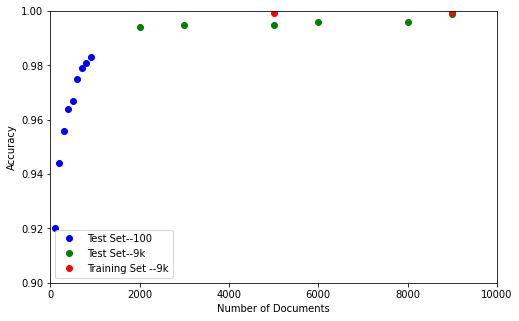

In [40]:
import matplotlib.pyplot as plt
#TODO add training perf
#plt.plot(test_doc_count, test_perf, 'ro')
# manual plotting on large dataset 5000-9000 that takes more resource and time to run
plt.figure(figsize=(8,5))
plt.plot([100,200,300,400,500,600,700,800,900],[0.920,0.944,0.956,0.964,0.967,0.975,0.979,0.981,0.983], 'bo')
plt.plot([2000,3000,5000,6000,8000,9000], [0.994,0.995,0.995,0.996,0.996,0.999], 'go')
plt.plot([5000,9000], [0.9994,0.9998], 'ro')

plt.axis([0, 10000, 0.90, 1.00])
plt.ylabel('Accuracy')
plt.xlabel('Number of Documents')
plt.legend(["Test Set--100",'Test Set--9k', 'Training Set --9k'], loc='best')
plt.show()

### Predict the test set and look at performance

In [41]:
import pickle
#filename = 'sklearn_crf_model_100-100i.sav'
#filename = 'sklearn_crf_model_9k-50i.sav'
#filename = 'sklearn_crf_model_100-100i.sav'
filename = 'sklearn_crf_model_10k-100i.sav'

# save model to disk for further run
pickle.dump(crf, open(filename, 'wb'))
print("File:", filename)

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print("Train set num sentences:", len(y_train))
print("Performance on training set:", result)

result = loaded_model.score(X_test, y_test)
print("Test set num sentences:", len(y_test))
print("Performance on test set:", result)


#y_predict = loaded_model.predict(X_test)
#print("x_test[0]", X_test[0])
#print("y_predict[0]", y_predict[0])

#File: sklearn_crf_model_100-100i.sav --optimized param
#Performance on training set: 0.9997040369361904
#Performance on test set: 0.9783544382758406
#NOTE perf is lower 0.9819 

#File: sklearn_crf_model_100-100i.sav -- with text corrections
#Performance on training set: 0.9996959978111842
#Performance on test set: 0.979850704383454

#File: sklearn_crf_model_8k-50i.sav -- 08-05-2019
#Performance on training set: 0.9992224760896037
#Performance on test set: 0.9961086516225393

#With new 10K docs -- full 10k training on 20% test split 10/22/2019
#Train set num sentences: 58324
#Performance on training set: 0.9997693866559333
#Test set num sentences: 14581
#Performance on test set: 0.9974465107523913

#File: sklearn_crf_model_100-100i.sav -- old c1,c2
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.982883439025759

#File: sklearn_crf_model_100-100i.sav
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.9839497165946461

File: sklearn_crf_model_10k-100i.sav
Train set num sentences: 800
Performance on training set: 0.9999449329099286
Test set num sentences: 200
Performance on test set: 0.9874046084315034


In [42]:
t = "ចំណែកជើងទី២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
pred = loaded_model.predict([features])
print("features:", features[0:2])
print("\npredict seg:", pred )

separator = "-"
tkcc = []
for k in features:
  tkcc.append(k['kcc'])
print("kcc:", tkcc)
complete = ""
for i, p in enumerate(pred[0]):
    if p == "1":
      complete += separator + tkcc[i]
    else:
      complete += tkcc[i]
complete = complete.strip(separator)
complete = complete.replace(separator+" "+separator, " ")
print("segment:", complete)
print("correct:", t_correct)

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}]

predict seg: [['1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1']]
kcc: ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២', 

In [43]:
# output predicted -- give a string to be split by newline and sentences
def segment_text(str, spacer=" "):
  complete = ""
  for sen in str.split('\n'):
    if sen.strip() == "": continue
    sen = sen.replace(u' ','')
    kccs = seg_kcc(sen)
    features=create_kcc_features(kccs)
    # predicts take list of sentences features
    prediction = crf.predict([features])
  
    #print("-len kccs:", len(kccs), " data 13:", kccs[:13])
    #print("-len feature:", len(features), " data 3:", features[:3])
    #print("-len prediction:", len(prediction), "data[0]:", prediction[0])

    for i, p in enumerate(prediction[0]):
        if p == "1":
            complete += spacer + kccs[i]
        else:
            complete += kccs[i]
    complete += "\n"
  complete = complete.replace(spacer+" ", " ").replace(" "+spacer, " ") # no 200b before or after space
  return complete[:-1]

print("seg:", segment_text("ចំណែកជើងទី២ \n\n\nនឹងត្រូវធ្វើឡើង\n\nឯប្រទេសកាតា៕"))

seg:  ចំណែក ជើង ទី ២
 នឹង ត្រូវ ធ្វើ ឡើង
 ឯ ប្រទេស កាតា ៕


In [44]:
t_orig = """សេតវិមាន​ទាត់ចោល​កិច្ចសហការ​ក្នុង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លើ​លោក​ត្រាំ

​សេតវិមាន​ដ៏​រឹងរូស​បាន​ប្រកាស​សង្គ្រាម​កាលពី​ថ្ងៃអង្គារ​ទី ៨ តុលា​ប្រឆាំង​នឹង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លោក​ដូណាល់ ​ត្រាំ ​ដោយ​ពន្លះ​ដំណើរការ​នេះ​ថា​ ​បក្សពួក​និយម ​ខុស​ច្បាប់​ ​និង​ ​ផ្ទុយ​រដ្ឋធម្មនុញ្ញ ​ហើយ​និយាយ​ថា​ទាំង​ប្រធានាធិបតី​និង​រដ្ឋបាល​របស់​គាត់​នឹង​មិន​សហការ​ទេ​នៅក្នុង​លិខិត​ពោរពេញ​ដោយ​កំហឹង​ ​សេតវិមាន​បាន​វាយ​សំពង​ទៅលើ​ប្រធាន​សភា​លោកស្រី​ណាន់​ស៊ី ​ផេឡូស៊ី ​និង​ ​ប្រធាន​គណៈកម្មាធិការ​សភា​ចំនួន​ ៣ ​ដែល​ដឹកនាំ​ការស៊ើបអង្កេត​នេះ​ ​ដោយ​ជំរុញ​ពួកគេ​ឱ្យ​បន្ត​ប្រឹងប្រែង​បណ្តេញ​លោក​ត្រាំតទៅទៀត​ចុះ​ ​ទោះបី​គ្មាន​កិច្ចសហប្រតិបត្តិការ​នា​ពេល​អនាគត​ក៏ដោយ​។

​ទីប្រឹក្សា​សេតវិមាន​លោក​ផាត់ ​ស៊ី​បូល​ឡូន ​បាន​សរសេរ​នៅក្នុង​លិខិត​កម្រាស់​ ៨ ​ទំព័រ​ថា​ “​និយាយ​ឱ្យ​ចំ​ទៅ​ ​អ្នក​កំពុង​ស្វះស្វែង​បដិសេធ​លទ្ធផល​នៃ​ការបោះឆ្នោត​ឆ្នាំ​ ២០១៦ ​និង​ដកហូត​សិទ្ធិ​របស់​ពលរដ្ឋ​អាម៉េរិក​ក្នុង​ការបោះឆ្នោត​ជ្រើសរើស​ប្រធានាធិបតី​ដោយ​សេរី​”​។

​ទាក់ទិន​នឹង​ការស៊ើបអង្កេត​ដែល​កំពុង​ធ្វើឡើង​ដើម្បី​រកមើល​ថា​តើ​លោក​ត្រាំ​បាន​រំលោភ​ការិយាល័យ​របស់​លោក​ដោយ​ស្វែងរក​ការស៊ើបអង្កេត​អំពី​អំពើពុករលួយ​នៅ​អ៊ុយក្រែន​លើ​គូ​ប្រជែង​របស់​លោក​គឺ​លោក​ ​ចូ ​បាយ​ដិន ​ឬ​អត់​នោះ​ លោក​ស៊ីបូល​ឡូន​និយាយ​ថា​ “​ការស៊ើបអង្កេត​របស់​អ្នកឯង​ខ្វះ​មូលដ្ឋាន​រដ្ឋធម្មនុញ្ញ​ស្រប​ច្បាប់​ ​ខ្វះ​អំណះអំណាង​យុត្តិធម៌​ ​និង​សូម្បី​ខ្វះ​នូវ​ភស្តុតាង​គោលបំផុត​ក្នុង​ដំណើរការ​ស៊ើបអង្កេត​នេះ​។

 ​ប្រធានាធិបតី​ត្រាំ​មិន​អាច​អនុញ្ញាតឱ្យ​រដ្ឋបាល​គាត់​ចូលរួម​ក្នុង​ការស៊ើបអង្កេត​ប្រកាន់​បក្ខពួក​នេះ​នៅក្រោម​កាលៈទេសៈ​ដូច្នេះ​ទេ​”​។

 ​លោកស្រី​ផេឡូស៊ី​បាន​វាយ​បក​វិញ​ ​ដោយ​ហៅ​លិខិត​នោះ​ថា​ “​ខុស​ទាំង​ដុល​” ​និង​ពណ៌នាវា​ថា​ជា​ “​ការប៉ុនប៉ង​ខុស​ច្បាប់​មួយ​ទៀត​ដើម្បី​លាក់បាំង​ការពិត​”​។

 ​លោកស្រី​និយាយ​ថា​ ​“​ប្រធានាធិបតី​ត្រាំ ​លោក​ឯង​មិន​អាច​នៅ​ពីលើ​ច្បាប់​បាន​ទេ​។

 ​លោក​ឯង​នឹង​ត្រូវ​ចាប់​ឱ្យ​ទទួលខុសត្រូវ​”​។

 ​លោកស្រី​បាន​ព្រមាន​ថា​ “​ការបន្ត​ប្រឹងប្រែង​លាក់បាំង​ការពិត​នៃ​ការរំលោភ​អំណាច​របស់​ប្រធានាធិបតី​ពី​ប្រជាជន​នឹង​ត្រូវ​ចាត់ទុក​ជា​ភស្តុតាង​បន្ថែម​ទៀត​នៃ​ការធ្វើឱ្យ​ស្ទះ​ដល់​ការអនុវត្ត​ច្បាប់​”​៕

 ​ដោយ​៖​ ​កញ្ញា​ដាលី​ស"""
t=t_orig.replace(" ","")
seg = segment_text(t,"\u2022")
print("seg:", seg.replace("  "," "))
print("orig:", t_orig.replace(" ", "\u2022").replace("\n\n","\n"))

seg: •សេត•វិមាន•​•ទាត់•ចោល•​•កិច្ច•សហ•ការ•​•ក្នុង•​•ការ•ស៊ើប•អង្កេត•​•ដើម្បី•​•ចោទ•ប្រកាន់•​•លើ•​•លោក•​•ត្រាំ
•​•សេត•វិមាន•​•ដ៏•​•រឹង•រូស•​•បាន•​•ប្រកាស•​•សង្គ្រាម•​•កាល•ពី•​•ថ្ងៃ•អង្គារ•​•ទី•៨•តុលា•​•ប្រឆាំង•​•នឹង•​•ការ•ស៊ើប•អង្កេត•​•ដើម្បី•​•ចោទ•ប្រកាន់•​•លោក•​•ដូណាល់•​•ត្រាំ•​•ដោយ•​•ពន្លះ•​•ដំណើរ•ការ•​•នេះ•​•ថា•​​•បក្ស•ពួក•​•និយម•​•ខុស•​•ច្បាប់•​​•និង•​​•ផ្ទុយ•​•រដ្ឋ•ធម្មនុញ្ញ•​•ហើយ•​•និយាយ•​•ថា•​•ទាំង•​•ប្រធានាធិបតី•​•និង•​•រដ្ឋ•បាល•​•របស់•​•គាត់•​•នឹង•​•មិន•​•សហ•ការ•​•ទេ•​•នៅ•ក្នុង•​•លិខិត•​•ពោរ•ពេញ•​•ដោយ•​•កំហឹង•​​•សេត•វិមាន•​•បាន•​•វាយ•​•សំពង•​•ទៅ•លើ•​•ប្រធាន•​•សភា•​•លោក•ស្រី•​•ណាន់•​ស៊ី•​•ផេឡូស៊ី•​•និង•​​•ប្រធាន•​•គណៈកម្មាធិការ•​•សភា•​•ចំនួន•​•៣•​•ដែល•​•ដឹក•នាំ•​•ការ•ស៊ើប•អង្កេត•​•នេះ•​​•ដោយ•​•ជំរុញ•​•ពួក•គេ•​•ឱ្យ•​•បន្ត•​•ប្រឹងប្រែង•​•បណ្តេញ•​•លោក•​•ត្រាំត•ទៅ•ទៀត•​•ចុះ•​​•ទោះបី•​•គ្មាន•​•កិច្ច•សហ•ប្រតិបត្តិ•ការ•​•នា​•ពេល•​•អនាគត•​•ក៏•ដោយ•​•។
•​•ទី•ប្រឹក្សា•​•សេត•វិមាន•​•លោក•​•ផាត់•​ស៊ី•​•បូល•​•ឡូន•​•បាន•​•សរសេរ•​•នៅ•ក្នុង•​•លិខិត•​•កម្រាស់•​•៨•​•ទំព័រ•​•ថា•​“​•និយាយ•​•ឱ្យ•​•ចំ

### Result on different sizes and parameters

<pre>
# Performance on 100 docs -- try different parameters
#Performance on training set: 0.9997610717638024
#Performance on test set: 0.9721994535519126
# Increase iteration to 200 -- didn't help (training set already got close to 1.0)
#Performance on training set: 0.9997799966153326
#Performance on test set: 0.9779427359490986
# 100 iteration
#Performance on training set: 0.9998124882805175
#Performance on test set: 0.9768734559429042
# 50 iteration
#Performance on training set: 0.9998124882805175
#Performance on test set: 0.978040076859731
# iter:100 with c1:0.1 c2:0.1
#Performance on training set: 0.9997929606625259
#Performance on test set: 0.9800327332242226
# iter: 100: c1:0.1 c2.0.01
#Performance on training set: 0.9998102139406487
#Performance on test set: 0.9814729950900164
# iter: 100 c1:0.015 c2:0.0037 -- using the grid search below
#Performance on training set: 0.9998102139406487
#Performance on test set: 0.9819312602291326

#### for 5K articles == 50 itertaion
#Performance on training set: 0.9992818143571441
#Performance on test set: 0.9954152978132683
# 8K article, 77736 sentences model 98MB
#Performance on training set: 0.9990976674399077
#Performance on test set: 0.996076182286788
#9K 50 iteration --125MB -- after train 20GB
#Performance on training set: 0.9989628599520689
#Performance on test set: 0.9960639776208017
#9k 75 iteration--52MB
#Performance on training set: 0.9993083406544416
#Performance on test set: 0.9962459620036132
#9k 100 iteration--41MB
#Performance on training set: 0.9993263126303732
#Performance on test set: 0.9963247521770143
# 5k kcc 100 iteration to compare to char mem used 11MB vs 20MB
#Performance on training set: 0.999446032688189
#Performance on test set: 0.99588756247573
</pre>

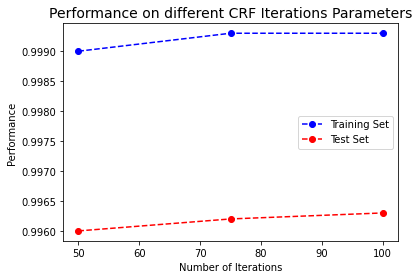

In [45]:
#@title Performance on Different CRF Iteration Parameters
# Performance with different iteration number on 9K articles count
from matplotlib.pylab import plt #load plot library
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot([50,75,100], [0.9990,0.9993,0.9993], "--b",marker='o', label="Training Set")
plt.plot([50,75,100], [0.9960,0.9962,0.9963], "--r",marker='o', label="Test Set")
plt.ylabel('Performance')
plt.xlabel('Number of Iterations')
plt.legend(["Training Set",'Test Set'], loc='best')
plt.title("Performance on different CRF Iterations Parameters", fontsize=14)
plt.show()


### Model file sizes

In [46]:
print("Used seg_text:", len(seg_text))
print("total data:", len(X), len(y))
print("number of sentences:", len(sentences))
!ls -alh *model*

# Look at the model output size per number of document (iteration affect the size)
#-rw-r--r-- 1 root root 126M Jul 22 00:23 sklearn_crf_model_9k-50i.sav
#-rw-r--r-- 1 root root  52M Jul 21 23:51 sklearn_crf_model_9k-75i.sav
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
# Doc size obviously affect the model size
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
#-rw-r--r-- 1 root root  23M Jul 23 04:10 sklearn_crf_model_5k-100i.sav
#-rw-r--r-- 1 root root 2.7M Jul 22 19:54 sklearn_crf_model_100-100i.sav

Used seg_text: 100
total data: 1000 1000
number of sentences: 1000
-rw------- 1 root root 1.8M Dec 10 09:03 crf.model
-rw------- 1 root root 929K Dec 10 09:03 sklearn_crf_model_10k-100i.sav


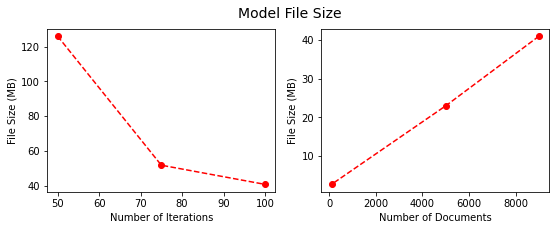

In [47]:
#@title Model File Size Chart
%matplotlib inline
iterations = [50,75,100]
iteration_fsize = [126,52,41]
doc_sizes = [9000,5000,100]
doc_fsizes = [41,23,2.7]
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

axs[0].plot(iterations, iteration_fsize, "--r",marker='o')
axs[0].set_xlabel('Number of Iterations')
axs[0].set_ylabel('File Size (MB)')
axs[1].plot(doc_sizes, doc_fsizes, "--r",marker='o')
axs[1].set_ylabel('File Size (MB)')
axs[1].set_xlabel('Number of Documents')
fig.suptitle('Model File Size', fontsize=14)
plt.show()

### Hyper parameter tuning

#### Randomized Search

In [48]:
%%time
# use RandomizedSearch with F1 score
#import nltk
#import sklearn
import scipy.stats

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

# define fixed parameters and parameters to search
def run_randomize_search():
  crf = sklearn_crfsuite.CRF(
      algorithm='lbfgs',
      max_iterations=100,
      all_possible_transitions=True
  )
  params_space = {
      'c1': scipy.stats.expon(scale=0.5),
      'c2': scipy.stats.expon(scale=0.05),
  }

  #clabels = list(crf.classes_)
  clabels = ['1', '0']

  # use the same metric for evaluation
  f1_scorer = make_scorer(metrics.flat_f1_score,
                          average='weighted', labels=clabels)

  # search
  rs = RandomizedSearchCV(crf, params_space,
                          cv=3,
                          verbose=1,
                          n_jobs=-1,
                          n_iter=50,
                          scoring=f1_scorer)
  rs.fit(X_train, y_train)
  return rs

# Fitting 3 folds for each of 50 candidates, totalling 150 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
# [Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 32.0min finished
# CPU times: user 31min 42s, sys: 17.5 s, total: 32min
# Wall time: 32min 16s

CPU times: user 54 µs, sys: 1e+03 ns, total: 55 µs
Wall time: 57.7 µs


In [49]:
#uncomment me to run randomize search
rs=run_randomize_search()

crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

import pandas as pd
print('grid score:', rs.cv_results_)
dfrs = pd.DataFrame(rs.cv_results_)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs.drop("params", axis=1, inplace=True)

print(dfrs.head())
print(dfrs.info())

# for p in dfrs["param_c1"]:
#   print ("P:",p, type(p))

# for s in rs.cv_results_.keys():
#   print('rs cv_results key:', s)
#   print('rs cv_results:', rs.cv_results_[s])
  
#best params: {'c1': 0.13787813729888343, 'c2': 0.01439440358969233}
#best CV score: 0.971210607745938
#model size: 1.73M
# 50 plot 
#best params: {'c1': 0.014907906173550766, 'c2': 0.0037402642391942613}
#best CV score: 0.9699000433318031
#model size: 3.08M

# 100_200b model - 10/27/2019
#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#best CV score: 0.9789616724105187
#model size: 1.63M

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 17.8min finished


best params: {'c1': 0.019511284373741476, 'c2': 0.009381380281877268}
best CV score: 0.9838955556550069
model size: 1.99M
grid score: {'mean_fit_time': array([5.8549432 , 6.14920608, 6.12130984, 6.18345022, 6.12927198,
       6.17304198, 6.11599398, 6.20704699, 6.12706892, 6.21070107,
       6.16985027, 6.22301062, 6.21561289, 6.15674178, 6.16769568,
       6.17421603, 6.21788359, 6.11864909, 6.16506362, 6.10852448,
       6.06020355, 6.02795362, 6.02314393, 6.05775841, 6.05491447,
       5.9444952 , 6.01198141, 6.06072124, 6.00772651, 5.99996098,
       6.10413265, 6.02621826, 6.01715986, 6.04578114, 6.10854093,
       6.06175145, 6.10824466, 6.08605758, 6.11501598, 6.13879895,
       6.0988435 , 6.05117877, 6.06255817, 6.181674  , 6.00609859,
       6.15815051, 6.00624029, 6.03180981, 6.11884729, 6.0704879 ]), 'std_fit_time': array([0.13059319, 0.13822215, 0.17701258, 0.16527787, 0.14157822,
       0.10368238, 0.21423874, 0.12452169, 0.1337425 , 0.10854186,
       0.1420275 , 0.17487

Dark blue => 0.9747, dark red => 0.9839


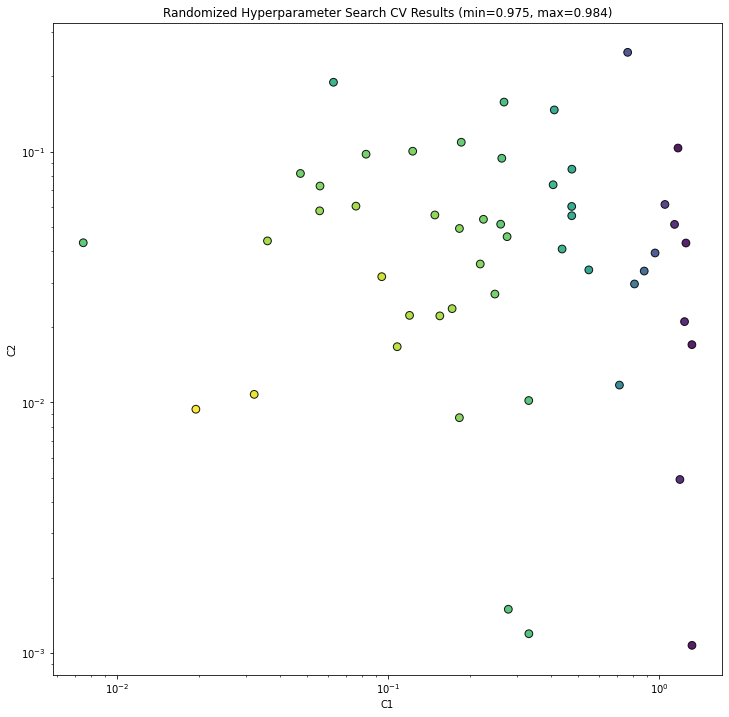

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

_x = dfrs["param_c1"] #[s.parameters['c1'] for s in rs.cv_results_]
_y = dfrs["param_c2"] #[s.parameters['c2'] for s in rs.cv_results_]
_c = dfrs["mean_test_score"] #[s.mean_validation_score for s in rs.cv_results_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

#ax.legend("o", _c)
ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

#### Grid Search

In [51]:
# setup grid search method
from sklearn.model_selection import GridSearchCV
from time import time
def run_grid_search():
  parameters = {
      'c1': [0.001, 0.01, 0.1],
      'c2': [0.001, 0.01, 0.1],
  }
  # run grid search
  grid_search = GridSearchCV(crf, param_grid=parameters, cv=3, iid=False, scoring=f1_scorer)
  start = time()
  grid_search.fit(X, y)

  print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
        % (time() - start, len(grid_search.cv_results_['params'])))
  return grid_search

In [52]:
# grid search results
import numpy as np
#grid_search.cv_results_
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# uncomment me out to run grid search
#gs = run_grid_search()            
#report(gs.cv_results_)

## Result and Evaluation

Edit distance vs accuracy by word
Accuracy by character vs word




### Performance Result

In [53]:
#type(crf)
crf = loaded_model
y_train_predict = crf.predict(X_train)
y_predict = crf.predict(X_test)

In [54]:
#@title Metric methods 
def editDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

#print("test training performance...", datetime.now())

def count_correct_word(correctstr, predictionstr):
  #print("prediction:", prediction)
  #print("   correct:", correct)
  correct = [int(c) for c in correctstr]
  prediction = [int(p) for p in predictionstr]
  B=False
  correct_count = 0
  for i,c in enumerate(correct):
    p = prediction[i]
    nextc = -1
    if i < len(correct)-1: 
      nextc = correct[i+1]
    if c==1 and p==1:
      B = True
      correct_count += 1
      #print(i,"Begin word corect", correct_count)
    if p==0 and c==1 and B:
      B = False
      correct_count -= 1
      #print(i, "too long")
    if c==0 and p==1: #incorrect
      if B: 
        correct_count -= 1
        #print(i,"bad word", correct_count)
        B = False
  return correct_count

In [55]:
def calc_performance(corrects, predictions): # list of 0/1
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_word = 0
  n_correct_word = 0
  
  print("size of input:", len(predictions), "ground truth:", len(corrects))
  if len(predictions) != len(corrects): return 0
  
  for i, prediction in enumerate(predictions):
    correct = corrects[i]
    zipped = list(zip(prediction, correct))    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])

    total_word += len([_ for l in correct if l=="1"])
    total_char += len(prediction)
    n_correct_word += count_correct_word(correct, prediction)
  
  print("Total char:", str(total_char), " total word:", str(total_word), "avg char/word:", str(total_char/total_word))
  print("Correct word:" + str(n_correct_word), " incorrect word:", str(total_word - n_correct_word), "word accuracy:", n_correct_word/total_word) 
  
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  F1 = 2 * (precision * recall) / (precision + recall)
  print("Precision:\t" + str(precision), "tp:", tp, "fp:", fp)
  print("Recall:\t\t" + str(recall), "fn:",fn)
  print("F1-score:\t" + str(F1))
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) 

print("Train set:======")
calc_performance(y_train, y_train_predict)
print("Test set:======")
calc_performance(y_test, y_predict)

# 8K, 50 iteration
# size of input: 14995 ground truth: 14995
# Total char: 1267427  total word: 549151 avg char/word: 2.3079754020296783
# Correct word:541922  incorrect word: 7229 word accuracy: 0.9868360432740721
# Precision:	0.9957983422948048 tp: 546525 fp: 2306
# Recall:		0.9952180729890322 fn: 2626
# F1-score:	0.995508123083985
# Accuracy:	0.9961086516225393

# 9K, 50 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603368  incorrect word: 8062 word accuracy: 0.9868145167885122
# Precision:	0.9962516150479069 tp: 608374 fp: 2289
# Recall:		0.995001880836727 fn: 3056
# F1-score:	0.9956263557683417
# Accuracy:	0.9962204325748506

## 9K, 100 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603921  incorrect word: 7509 word accuracy: 0.9877189539276777
# Precision:	0.9962533268297155 tp: 608653 fp: 2289
# Recall:		0.9954581881818033 fn: 2777
# F1-score:	0.9958555987866214
# Accuracy:	0.9964177196303449

#2k
# size of input: 65431 ground truth: 65431
# Total char: 5501263  total word: 2375882 avg char/word: 2.3154613739234526
# Correct word:2328188  incorrect word: 47694 word accuracy: 0.9799257707243036
# Precision:	0.9931317368571949 tp: 2358959 fp: 16314
# Recall:		0.9928771715093595 fn: 16923
# F1-score:	0.9930044378682658
# Accuracy:	0.9939582964857343

#3k
# size of input: 56203 ground truth: 56203
# Total char: 4721570  total word: 2036734 avg char/word: 2.3182065011925954
# Correct word:2001871  incorrect word: 34863 word accuracy: 0.9828828899601028
# Precision:	0.9941444595803693 tp: 2024438 fp: 11924
# Recall:		0.9939628837148101 fn: 12296
# F1-score:	0.9940536633558356
# Accuracy:	0.9948703503283866

#6k #to copy below X 55k,28k
# size of input: 28521 ground truth: 28521
# Total char: 2395497  total word: 1033089 avg char/word: 2.3187711804113684
# Correct word:1019364  incorrect word: 13725 word accuracy: 0.9867146005813633
# Precision:	0.9959204907423912 tp: 1028021 fp: 4211
# Recall:		0.9950943239159453 fn: 5068
# F1-score:	0.9955072359211957
# Accuracy:	0.9961264823124387

Train set:======
size of input: 800 ground truth: 800
Total char: 54479  total word: 26709 avg char/word: 2.0397244374555394
Correct word:26706  incorrect word: 3 word accuracy: 0.9998876783106818
Precision:	0.9998876909254267 tp: 26709 fp: 3
Recall:		1.0 fn: 0
F1-score:	0.9999438423092042
Accuracy:	0.9999449329099286
Test set:======
size of input: 200 ground truth: 200
Total char: 13497  total word: 6640 avg char/word: 2.032680722891566
Correct word:6447  incorrect word: 193 word accuracy: 0.970933734939759
Precision:	0.9847168115073419 tp: 6572 fp: 102
Recall:		0.9897590361445783 fn: 68
F1-score:	0.9872314856541986
Accuracy:	0.9874046084315034


In [56]:
flat_predicts = [item for t in y_predict for item in t]
flat_true = [item for t in y_test for item in t]
from sklearn.metrics import classification_report 
print(classification_report(flat_predicts, flat_true, 
      target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6823
           1       0.99      0.98      0.99      6674

    accuracy                           0.99     13497
   macro avg       0.99      0.99      0.99     13497
weighted avg       0.99      0.99      0.99     13497



### Detail performance of specific test set

In [57]:
from datetime import datetime

# Test performance on training set
def test_performance(sentences):
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_kcc = 0
  total_word = 0
  n_correct_word = 0
  n_incorrect_word = 0
  n_edit = 0
  
  print("size of input:", len(sentences))
  for sen in sentences:
    #print("size of s:", len(s)) #testing validation set
    sen_orig = sen
    
    #sen = sen.replace(" ","") # remove spaces
    #kccs = seg_kcc(sen)
    total_char += len(sen)
    
    
    
    kccs_label = gen_kcc_with_label(sen_orig)
    # get kccs without label
    kccs = [kl[0] for kl in kccs_label]
    total_kcc += len(kccs)
    
    # predict using pycrfsuite
    #prediction = tagger.tag(create_kcc_features(kccs))
    
    # predict using sklearn_crf
    preds = loaded_model.predict([create_kcc_features(kccs)])
    prediction = preds[0]
    correct = create_labels_from_kccs(kccs_label)
    
    zipped = list(zip(prediction, correct))
    #print("len kccs_label", len(kccs_label), " pred:", kccs_label)
    #print("len correct", len(correct), " pred:", correct)
    #print("len predict", len(prediction), " pred:", prediction)
    #print("len sen_orig", len(sen_orig), " pred:", sen_orig)
    
    #print("len zipped", len(zipped), zipped)
    #print("seg:", segment_kcc_phrase(sen.replace(" ","")))
    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])
    #n_correct_word += len([1 for l,c in zipped if l=='1' and c=='1']) 
    n_correct_word += count_correct_word(correct, prediction)
    n_incorrect_word += len([1 for l,c in zipped if l=='0' and c=='1'])
    #total_word += len([1 for l in correct if l=='1'])
    total_word += len([_ for l in correct if l=='1'])
    n_edit += editDistance(prediction,correct)
    #print("len correct", len(correct), " incorrect count:", n_incorrect)
  print("Total char:", str(total_char)," kcc:", str(total_kcc), " total word:", str(total_word))
  print("avg char/kcc:", str(total_char/total_kcc)," avg char/word:", str(total_char/total_word)," avg kcc/word:", str(total_kcc/total_word))
  print("correct kcc:" + str(n_correct), " incorrect kcc:", str(n_incorrect), " kcc accuracy:", n_correct/total_kcc)
  print("correct word:" + str(n_correct_word), " missed word:", str(n_incorrect_word), "word accuracy:", n_correct_word/total_word) #10: 0.98, 100:0.981
  print("n_edit:", n_edit, "/", total_word, " pct edit/kcc:", (n_edit/total_kcc), " acc:", 1.0-(n_edit/total_kcc)) #10 0.98 100:0.99

  print("Precision:\t" + str(tp/(tp+fp))) # 10: 0.96, 100: 0.979
  print("Recall:\t\t" + str(tp/(tp+fn))) # 10: 0.98, 100: 0.981
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) # 10 article 0.986, 100:0.991
  
"""
avg char/kcc: 1.8177994491178442  avg char/word: 4.701742562818908  avg kcc/word: 2.586502358717628
correct kcc:24793  incorrect kcc: 2073
correct word:9314  missed word: 1039 word accuracy: 0.8966977953210744
n_edit: 85 / 10387  pct edit/word: 0.008183306055646482  acc: 0.9918166939443536
Precision:	0.9000773096250483
Recall:		0.8996426156669565
Accuracy:	0.9228392764088439
"""

# only use for big dataset which set aside the test set
print("Performance on training set: ================ ")
test_performance(sentences[:500]) # not same test split data -- since test split is all random
print("Performance on test set: ================ ")
test_performance(sentences[500:]) # not the same test split data -- may used in training -- BOGUS

Performance on training set: ================ 
size of input: 500
Total char: 79824  kcc: 33037  total word: 16222
avg char/kcc: 2.4162000181614554  avg char/word: 4.920724941437554  avg kcc/word: 2.0365552952780175
correct kcc:32950  incorrect kcc: 87  kcc accuracy: 0.9973665889759966
correct word:16127  missed word: 34 word accuracy: 0.9941437553939095
n_edit: 81 / 16222  pct edit/kcc: 0.002451796470623846  acc: 0.9975482035293761
Precision:	0.9967366541469121
Recall:		0.9979040808778202
Accuracy:	0.9973665889759966
Performance on test set: ================ 
size of input: 500
Total char: 83801  kcc: 34939  total word: 17127
avg char/kcc: 2.3984945190188616  avg char/word: 4.892917615460968  avg kcc/word: 2.0399953290126702
correct kcc:34853  incorrect kcc: 86  kcc accuracy: 0.9975385672171498
correct word:17026  missed word: 34 word accuracy: 0.994102878495942
n_edit: 84 / 17127  pct edit/kcc: 0.0024041901599931308  acc: 0.9975958098400068
Precision:	0.9969670457859434
Recall:		0.99

In [ ]:
cpred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']
ppred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']


### Compare Performance on CRF Both Libraries (pycrfsuite and sklearn crfsuite)
The output looks identical between the two libraries.

In [58]:
# using pycrfsuite
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')

y_train_pred = [tagger.tag(xseq) for xseq in X_train]
print("X_train[0]", X_train[0])
print("y_train_pred[0]", y_train_pred[0])
print("y_train[0]     ", y_train[0])

y_pred = [tagger.tag(xseq) for xseq in X_test]
print("len y_pred:", len(y_pred))
print("X_test[0]", X_test[0])
print("len y_pred[0]", len(y_pred[0]), y_pred[0])
print("y_test[0]", y_test[0])

X_train[0] [{'kcc': 'គា', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ត់', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'គាត់', 'ns+1': False, 'kcc[+2]': 'បា', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'ត់បា', 'kcc[0:+2]': 'គាត់បា', 'ns+2': False, 'kcc[+3]': 'ន', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'បាន', 'kcc[+1:+3]': 'ត់បាន', 'kcc[0:+3]': 'គាត់បាន'}, {'kcc': 'ត់', 't': 'K2', 'ns': False, 'kcc[-1]': 'គា', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'គាត់', 'ns-1': False, 'kcc[+1]': 'បា', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ត់បា', 'ns+1': False, 'kcc[+2]': 'ន', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'បាន', 'kcc[0:+2]': 'ត់បាន', 'ns+2': False, 'kcc[+3]': 'ឈ', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'នឈ', 'kcc[+1:+3]': 'បានឈ', 'kcc[0:+3]': 'ត់បានឈ'}, {'kcc': 'បា', 't': 'K2', 'ns': False, 'kcc[-1]': 'ត់', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ត់បា', 'ns-1': False, 'kcc[-2]': 'គា', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'គាត់', 'kcc[-2:0]': 'គាត់បា', 'kcc[+1]': 'ន', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'បាន', 'ns+1': False, 'kcc[+2]': 'ឈ', 'kcc[+2]t': 'C', 'kcc[+1:+

In [59]:
# using sklearn
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_train_pred_sk = loaded_model.predict(X_train)
y_test_pred_sk  = loaded_model.predict(X_test)
print("test_pred", len(y_test_pred_sk))
print(len(y_test_pred_sk[0]), y_test_pred_sk[0])
print("test_pred", len(y_pred))
print(len(y_pred[0]), y_pred[0])

test_pred 200
80 ['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1']
test_pred 200
80 ['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1']


In [60]:
# metric
import numpy as np
from sklearn.metrics import classification_report

print("=== Training set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_train for item in l_sen])
preds  = np.array([item for l_sen in y_train_pred for item in l_sen])
preds2  = np.array([item for l_sen in y_train_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds2:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))

print("=== Test set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_test for item in l_sen])
preds  = np.array([item for l_sen in y_pred for item in l_sen])
preds2 = np.array([item for l_sen in y_test_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))


=== Training set performance === 
 truths: 54479 ['1' '0' '1' ... '0' '0' '1']
 preds: 54479 ['1' '0' '1' ... '0' '0' '1']
 preds2: 54479 ['1' '0' '1' ... '0' '0' '1']
- using pycrfsuite
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27770
           1       1.00      1.00      1.00     26709

    accuracy                           1.00     54479
   macro avg       1.00      1.00      1.00     54479
weighted avg       1.00      1.00      1.00     54479

- using sklearn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27770
           1       1.00      1.00      1.00     26709

    accuracy                           1.00     54479
   macro avg       1.00      1.00      1.00     54479
weighted avg       1.00      1.00      1.00     54479

=== Test set performance === 
 truths: 13497 ['1' '0' '1' ... '1' '0' '1']
 preds: 13497 ['1' '0' '1' ... '1' '0' '1']
 preds: 13497 ['1' '0' '

## Analysis

We did some write up analysis on the Blog post that you can see.
https://medium.com/@phylypo/segmentation-of-khmer-text-using-conditional-random-fields-3a2d4d73956a

### Test sample data

In [61]:
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
print("features:", features)
print("\npredict seg:", crf.predict([features]))

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}, {'kcc': 'ក', 't': 'C', 'ns': False, 'kcc[-1]': 'ណែ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ណែក', 'ns-1': False, 'kcc[-2]': 'ចំ', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'ចំណែ', '

In [62]:
# Create KCC using phrase, but pass in the whole sentence to CRF
def segment_kcc_phrase(sentence):
  complete = ""
  sentence = sentence.replace(u' ','')
  kccs = seg_kcc(sentence)

  #TODO should feed the whole sentence, not phrase, kcc already capture english spaces
  features = create_kcc_features(kccs)
  prediction = crf.predict([features])

  for i, p in enumerate(prediction[0]):
      if p == "1":
          complete += " " + kccs[i]
      else:
          complete += kccs[i]
  complete = complete.strip().replace("  "," ")
  complete = complete.strip().replace("  "," ")
  return complete
  
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
#featrues = create_kcc_features(skcc)
print(" seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត"
t_correct = "យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត "
print("\n seg:", segment_kcc_phrase(t).strip().replace('  ',' '))
print("corr:", t_correct)
t= 'ថ្ងៃ​ទី០២ ខែមករា ឆ្នាំ​២០១៤ '
t_correct = "ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "2019-07-12 03:39:34.540220"
t_correct = "2019-07-12 03:39:34.540220"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = 'តើអ្នកប្រាប់ខ្ញុំបានទេថាពេលណាត្រូវចុះពីឡានក្រុង ? '
t_correct = 'តើ អ្នក ប្រាប់ ខ្ញុំ បាន ទេ ថា ពេលណា ត្រូវ ចុះ ពី ឡានក្រុង ?'
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)

len kcc: 21 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
 seg: ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើ ឡើង ឯ ប្រទេស កាតា ៕
corr: ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ 

 seg: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យ ដឹង ថា កាល ពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រ ភព អង់គ្លេស RoyalMarines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹប អូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើ ដំណើរ ទៅ កាន់ រោង ចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការ រឹប អូស ត្រូវ បាន គេ សំដៅ អនុវត្ត
corr: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត 

 seg: ថ្ងៃ ​ ទី ០២ ខែ មករា ឆ្នាំ ​ ២០១៤
corr: ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤

 seg: 2019-07-1203:39:34. 540220
corr: 2019-07-12 03:39:34.

### Searching text and fixing

In [64]:
#" ឡុង "=2 #"ឡុងដ៍" never seen
#នៅក្នុង=79, " ពេលណា"=0
#ធ្វើឡើងឯ
found = []
#s = "ខេង".strip()
s = "អ្នក".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
if (len(found)>0):
  print("sample sentence #0: %s" %(repr(found[0])))
  for sen in found:
    idx = sen.find(s)
    sidx = idx - 15 if idx>15 else 0
    eidx = idx + 15 if idx+15<len(sen) else len(sen)
    print("start idx:", sidx, eidx, "len:", len(sen))
    print("Found s:", repr(sen[sidx:eidx]))

# names to fix
t="""
ឡុង ប៊ុន ហោ
ឡុងដ៍
នៅក្នុង <= នៅ ក្នុង
រោង ចក្រចម្រាញ់ < រោងចក្រ ចម្រាញ់
ហុក ឡង ឌី -> ហុក ឡងឌី 
"""

total len of found: 249
sample sentence #0: 'អ្នកស្រុកបានប្រុងប្រៀបខ្លួនទប់ទល់នឹងសីតុណ្ហភាពដែលក្តៅរហូតដល់បំបែកកំណត់ត្រា។\n'
start idx: 0 15 len: 76
Found s: 'អ្នកស្រុកបានប្រ'
start idx: 6 36 len: 121
Found s: 'ឌេតថីតអ៊ីឌីសិន អ្នកផ្គត់ផ្គង់ថ'
start idx: 0 15 len: 172
Found s: 'អ្នករាយការណ៍គឺថ'
start idx: 0 20 len: 258
Found s: 'គ្មានអ្នករាយការណ៍ណាប'
start idx: 113 143 len: 219
Found s: 'ឆ្នាំមុន ដែលថា អ្នកនាង Miller '
start idx: 102 132 len: 173
Found s: '្វែងរកកំហុសរបស់អ្នករាយការណ៍ព័ត'
start idx: 35 64 len: 64
Found s: 'ាប់បែកដៃពីស្ពានអ្នកថ្មើរជើង។\n'
start idx: 28 58 len: 98
Found s: 'នត្រូវបានដុតដោយអ្នកគាំទ្រជឿជាក'
start idx: 3 33 len: 126
Found s: 'ើហឹង្សាដោយក្រុមអ្នកបំបែកខ្លួនម'
start idx: 0 21 len: 154
Found s: 'យោងតាមអ្នកនាំពាក្យរបស'
start idx: 0 28 len: 201
Found s: 'សមាជិកនៃក្រុមអ្នកកាន់សាសនាគ្'
start idx: 0 24 len: 90
Found s: 'ពីរនាក់នៃអ្នកប្រឆាំងបានថ'
start idx: 0 15 len: 196
Found s: 'អ្នកនាំពាក្យប៉ូ'
start idx: 28 58 len: 84
Found s: 'ាមួយយុវជន ដែលជាអ្នកមានទំនោរទៅល'
start 

### Final Training on Full Dataset
After we satisfied with our approach, we can use the more dataset to train such as the 5K or 10K batch.

To do that just change the batch size for 100 to 10K to load 10,000 articles. Note that training will take longer and you will need at least 24GB of RAM.

In addition, once you don't need to measure the performance any more, you can train on the whole dataset (leaving 0% test set) so we have more training data to improve the model. Use this as your final model.



## Data distribution

### Categories

In [65]:
import pandas as pd
meta = pd.read_csv(data_dir + '/meta.txt')
meta.info()
meta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      100 non-null    int64 
 1   docId      100 non-null    int64 
 2   category   100 non-null    object
 3   charCount  100 non-null    int64 
 4   wordCount  100 non-null    int64 
 5   url        100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


,index,docId,category,charCount,wordCount,url
0,1,250000,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
1,2,250001,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
2,3,250002,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
3,4,250003,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061
4,5,250004,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061


In [66]:
from urllib.parse import urlparse
domain = []
for index, row in meta.iterrows():
  parsed_uri = urlparse(row.url)
  #domain.append('{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri))
  domain.append('{uri.netloc}'.format(uri=parsed_uri).replace("www.",""))
print(domain[0:3])
meta["domain"] = domain
meta.head()


['thmeythmey.com', 'thmeythmey.com', 'thmeythmey.com']


,index,docId,category,charCount,wordCount,url,domain
0,1,250000,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
1,2,250001,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
2,3,250002,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
3,4,250003,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com
4,5,250004,hoang,252,29,https://thmeythmey.com/?page=detail&id=84061,thmeythmey.com


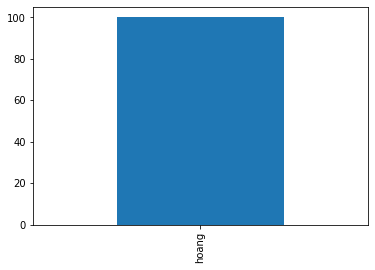

In [67]:
import matplotlib.pyplot as plt
#meta.hist()
cat = meta['category'][:800]
cat.head()
cat.value_counts().plot(kind='bar')
plt.show()

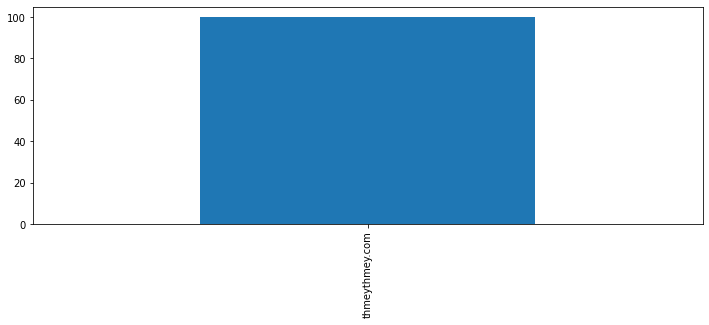

In [68]:
plt.figure(figsize=(12,4))
meta['domain'].value_counts().plot(kind='bar')
plt.show()

### Word Distribution

In [69]:
#Word size distribution
words = {}
word_count = 0
sentence_count = 0
wordspref = {} # first character key - list of words begin with a letter
wsize = [] # list of word size
for i, text in enumerate(seg_text):
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        sentence_count += 1
        for phrase in sentence.split():
          for word in phrase.split(' '):
            word_count += 1
            wsize.append(len(word))
            words[word] = 1 if word not in words.keys() else words[word] + 1
            pref = word[:1]
            if pref in wordspref:
              wlist = wordspref[pref]
              wlist.add(word)
              wordspref[pref] = wlist
            else: wordspref[pref] = set(word)
print("total number of articles:", len(seg_text))
print("total number of sentences:", sentence_count, " words:", word_count)
print("total number of distinct words:", len(words))
print("total number wordspref:", len(wordspref))

# for i, ws in enumerate(sorted(wordspref)):
#     s = wordspref[ws]
#     if i<10: print("key:", ws, "count:", len(s))

from collections import Counter
d = Counter(words)
print("Most frequent words:", d.most_common()[0:10])

# use first letter of the word to speed up lookup
def checkKeyPrefixExist(key):
  s = wordspref[key[0]]
  return key in s

print("test key exist: បាន ទ្បើង", checkKeyPrefixExist('បាន'), checkKeyPrefixExist('ទ្បើង'))
print('wlength:', len(wsize))


total number of articles: 100
total number of sentences: 1000  words: 33349
total number of distinct words: 3506
total number wordspref: 114
Most frequent words: [('បាន', 1188), ('។', 1001), ('ការ', 887), ('នៅ', 744), ('ដែល', 576), ('ក្នុង', 541), ('"', 479), ('ជា', 466), ('ថា', 438), ('របស់', 408)]
test key exist: បាន ទ្បើង True False
wlength: 33349


In [70]:
# see list of long words
for w in words:
  if len(w)>=15: print(w, len(w)) 

ម៉ាក់ស៊ីហ្គូរ៉ន 15
ត្រេនស្នីស្ថ្រីន 16
ភូលីដកូវស្កាយ៉ា 15
FreeMediaOnline.org 19
សេលីនូប្រូតេអ៊ីន 16
វ៉ាហ្ស៊ីរីស្ថាន 15
អាហ្វហ្គានីស្ថាន 16
ហេដ្ឋារចនាសម្ព័ន្ធ 18
ហ្វ្រាន់ស៊ីស្កូ 15
មេនញ្ញូហ្វេឆឆឺរីង 17


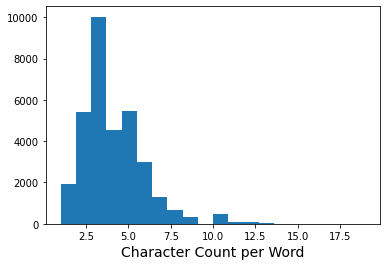

In [71]:
plt.hist(wsize, bins=20)
plt.xlabel(u'Character Count per Word',fontsize=14)
plt.show()

In [72]:
#@title Setup Khmer font for the graph (still not handling complex ligature like subscript)
# get Khmer font for matplotlib
from tempfile import NamedTemporaryFile
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
github_url = 'https://github.com/danhhong/KohSantepheap/blob/master/Release/KohSantepheap-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html
from urllib.request import urlopen
response = urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
khmer_font_prop = fm.FontProperties(fname=f.name,size=12)

Words: ['បាន', '។', 'ការ', 'នៅ', 'ដែល', 'ក្នុង', '"', 'ជា', 'ថា', 'របស់', 'និង', 'ពី', 'ត្រូវ', 'នៃ', 'អ្នក', 'មាន', 'មួយ', 'ទី', 'ទៅ', 'នេះ']


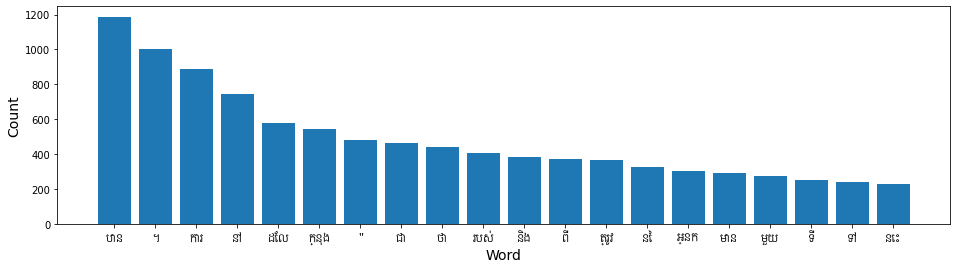

In [73]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt

data = d.most_common()[0:20]  # [('។', 797), ('បាន', 730), ('និង', 569)
print("Words:", [d[0] for d in data])
names = list(d[0] for d in data)
values = list(d[1] for d in data)

plt.figure(figsize=(16,4))
plt.bar(range(len(data)),values,tick_label=names)
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(khmer_font_prop)

plt.xlabel(u'Word',fontsize=14)
plt.ylabel(u'Count',fontsize=14)
plt.show()